---

_This notebook has been modifie from the **version 1.0** of the cousera course 'Applied Machine Learning in Python
Applied Machine Learning in Python, University of Michigan'. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-machine-learning/resources/bANLa) course resource._

---

# Applied Machine Learning: Module 3 (Evaluation)

## Evaluation for Classification

Accuracy, as you might recall, is the fraction of samples that were classified correctly. That is, where the classifier's predicted label matched the correct or true label. We also evaluated a regression model's performance using the default r squared metric. 


In this module, you'll learn why measures like accuracy, which are simple and easy to understand, also have drawbacks. In that they don't give a complete enough picture of a supervised learning model's performance. And may not be the right metric for measuring success in your application. 
<img src="module3_modeval_1.png" alt="jupyter" style="width: 600px;"/> 


So we're going to cover several additional evaluation metrics beyond accuracy. We'll see how they're defined, what the motivation is for using them, and how to use them scikit-learn to get a better picture of how well A supervised model is doing on a given data set. You'll also learn how about to choose the right evaluation matrix for your application that can help you select the best model or find the optimal parameters. 

<img src="module3_modeval_2.png" alt="jupyter" style="width: 600px;"/> 

So let's return for a moment to this workflow diagram that we introduced earlier in the course.You see that evaluation is a key part of this development cycle in applied machine learning. Once a model is trained, **the evaluation step provides critical feedback on the trained model's performance characteristics**. Particularly those that might be important for your application. 

The results of the evaluation step, for example, might help you understand which data instances are being classified or predicted incorrectly. Which might in turn suggest better features or different kernel function or other refinements to your learning model in the feature and model refinement phase. 

<img src="module3_modeval_3.png" alt="jupyter" style="width: 600px;"/> 

As we discussed earlier, the objective function that's optimized during the training phase may be a different, what's called a surrogate metric. That's easier to use in practice for optimization purposes than what's used for the evaluation metric. For example, **a commercial search engine might use a ranking algorithm that is trained to recommend relevant web pages that best match a query. In other words, trying to predict a relevant label for a page. And that might be the objective in the training phase. But there are many evaluation methods in the evaluation phase that could be applied to measure aspects of that search engine's performance using that ranking algorithm, that are important to the search company's business, for example. Such as how many unique users the system sees per day. Or how long the typical user search session is and so on.** 

So the evaluation measures are the ones that in the end are used to select between different trained models or settings. 

Actually **commercial search applications typically use a scorecard of multiple evaluation metrics to make important business decisions**. Or development decisions about what models are chosen for use. 

**So it's very important to choose evaluation methods that match the goal of your application.** 


For predicting the correct digit from a handwritten image, let's say, where each digit is equally likely, then accuracy may be a sufficient metric. However, there are other possible aspects of evaluation of model performance that are beyond average accuracy that may be critical to measure. For example, in a health application that uses a classifier to detect tumors in a medical image, we may want the classifier to error on the side of caution. And flag anything that even has a small chance of being cancerous. Even if it means sometimes incorrectly classifying healthy tissue as diseased. In this case, the classifier evaluation method would try to reduce what are called false negative predictions. We'll look at this in more detail shortly.

<img src="module3_modeval_4.png" alt="jupyter" style="width: 600px;"/> 

More generally, your application goal might be based on very different metrics, such as user satisfaction, amount of revenue to your page, or increase in patient survival rates. So in the end, you'll be selecting the model or parameter settings that optimize those end evaluation metrics that are important to your goal. So in this module, we'll be focusing first on the widely used case of evaluating binary classification. And then we'll look at evaluation for the more general case of multi-class evaluation as well as regression. 

<img src="module3_modeval_5.png" alt="jupyter" style="width: 600px;"/> 

Before we start defining and using some evaluation metrics for binary classification, lets start by looking at example of why **just looking at accuracy may not be enough to gain a good picture of what a classifier's doing**. It'll also show us how knowing more about the types of errors a learning algorithm makes can help us get a better picture of a model's predictive performance. 

First, let's consider the case where we have a **binary classification task**, where there are a lot of **instances labeled with the negative class. But only a few instances that belong to the positive class**. For example, we might see this scenario in online search or recommender systems. Where the system has to predict whether or not to display an advertisement or product suggestion. Or show a query suggestion or item on a page that's likely to be relevant given a user's query and what they clicked on in the past and so on. So those would be the positive examples. But of course there are many, many irrelevant items that are in the negative class that don't make sense to show a user. And so this is called an **imbalanced class scenario**. 

Another example might be datasets of credit card transactions. Where the vast majority of transactions are classified as normal and not fraud with a small minority of transactions that could be classified as fraudulent. These situations, which also apply to multi-class classification problems, involve datasets that have imbalanced classes. **Imbalanced classes are very common in machine learning scenarios**, so it's important to understand how to work with them.  

In particular, let's assume that we have an e-commerce application. Where for every 1,000 randomly sampled product items, one of them is relevant to a user's need and the other 999 are not relevant. So recall that **accuracy computed over a set of instances is just the number of instances where the classifier's label prediction was correct divided by the total number of instances**.

<img src="module3_modeval_6.png" alt="jupyter" style="width: 600px;"/> 

Let's suppose you develop a classifier for predicting relevant e-commerce items. And after you've finished the development, you measure its accuracy on the test set to be 99.9%. At first, that might seem to be amazingly good, right? That's incredibly close to perfect. But let's compare that to a **dummy classifier** that always just predicts the most likely class, namely, the not relevant class. In other words, **no matter what the actual instance is, the dummy classifier will always predict that an item is not relevant**.

<img src="module3_modeval_7.png" alt="jupyter" style="width: 600px;"/> 

So if we have a test set that has 1,000 items, on average 999 of them will be not relevant anyway. So our dummy classifier will correctly predict the not relevant label for all of those 999 items. And so the accuracy of the dummy classifier is also going to be 99.9%. So in reality our own classifier's performance isn't impressive at all. It's no better than just always predicting the majority class without even looking at the data. 

<img src="module3_modeval_8.png" alt="jupyter" style="width: 600px;"/> 

### Preamble

Let's take a look at another example of classification with imbalanced classes on a real dataset using our notebook. I'll start here using the digits dataset, which has images of handwritten digits labeled with ten classes, representing the digits zero through nine. As we can see by letting the dataset and then computing the count of instances in each class, using numpy's bin count method. There are roughly the same number of instances in each class. So this dataset has balanced classes. 

In [1]:
%matplotlib notebook
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits

dataset = load_digits()
X, y = dataset.data, dataset.target

In [11]:
dataset.target.shape

(1797,)

In [12]:
dataset.data.shape

(1797, 64)

In [13]:
dataset.data

array([[  0.,   0.,   5., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,  10.,   0.,   0.],
       [  0.,   0.,   0., ...,  16.,   9.,   0.],
       ..., 
       [  0.,   0.,   1., ...,   6.,   0.,   0.],
       [  0.,   0.,   2., ...,  12.,   0.,   0.],
       [  0.,   0.,  10., ...,  12.,   1.,   0.]])

In [8]:
#Count number of occurrences of each value in array of non-negative ints
np.bincount(dataset.target)

array([178, 182, 177, 183, 181, 182, 181, 179, 174, 180])

In [14]:
dataset.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

The result of ``np.bincount`` are the numver of occurances of the numbers in ``dataset.target_names``. 

In [15]:
for class_name, class_count in zip(dataset.target_names, np.bincount(dataset.target)):
    print(class_name, class_count)

0 178
1 182
2 177
3 183
4 181
5 182
6 181
7 179
8 174
9 180


However with this digits dataset, now what we're going to do is create a new dataset with two imbalanced classes. By labelling all digits that are not the digit 1 as the negative class with label 0, and digits that are 1 as the positive class, label 1. So what I've done here is dump the first few entries from the original labels along with the new binary label, so you can see the imbalance visually. 

In [20]:
# Creating a dataset with imbalanced binary classes:  
# Negative class (0) is 'not digit 1' 
# Positive class (1) is 'digit 1'
y_binary_imbalanced = y.copy()
y_binary_imbalanced[y_binary_imbalanced != 1] = 0

print('Original labels:\t', y[1:30])
print('New binary labels:\t', y_binary_imbalanced[1:30])

Original labels:	 [1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9]
New binary labels:	 [1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]


Now when we use bincount, we can see that there are about 1,600 negative examples, but only 182 positive examples. So indeed, we have a dataset that is class imbalanced. Or as expected almost exactly a nine to one ratio of negative to positive examples. 

In [21]:
np.bincount(y_binary_imbalanced)    # Negative class (0) is the most frequent class

array([1615,  182])

Now let's create a train test partition on this imbalance set. And then train a support vector machine classifier with these binary labels using the radial basis function as a kernel. We get the accuracy using the score method, and we can see this is just over 90%. Again at first glance, 90% accuracy for a classifier seems pretty good. 

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)

# Accuracy of Support Vector Machine classifier
from sklearn.svm import SVC

svm = SVC(kernel='rbf', C=1).fit(X_train, y_train)
svm.score(X_test, y_test)

0.90888888888888886

### Dummy Classifiers
(DummyClassifier is a classifier that makes predictions using simple rules, which can be useful as a baseline for comparison against actual classifiers, especially with imbalanced classes.)

However, now let's create a Dummy Classifier that correctly reflect the class imbalance to see if 90% really is that impressive. scikit-learn makes it easy to create a dummy classifier just by using the DummyClassifier class as shown here. 

Dummy classifiers, again, are called that because they don't even look at the data to make a prediction. They simply use the strategy or rule of thumb that you instruct them to use, when creating them. In fact, when you create the classifier, you set the strategy argument to tell it what rule of thumb to use to make its predictions. So here, we set this to the most frequent strategy to predict the most frequent class. 

The DummyClassifier here is used just like a regular classifier. So to prepare it for prediction, we call the fit method on the x_train and y_train variables that hold the training set instances and labels. Now this DummyClassifier won't actually be looking at the individual data instances of those variables. But it does use the y train variable to determine which class in the training data is most frequent. 

Finally, just like a regular classifier, we can call the predict method to make predictions on the test set. This example shows the output of the DummyClassifier's predictions. And as promised, you can see it's always predicting 0 or the negative class for every instance in the test set. 

In [23]:
from sklearn.dummy import DummyClassifier

# Negative class (0) is most frequent
dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)
# Therefore the dummy 'most_frequent' classifier always predicts class 0
y_dummy_predictions = dummy_majority.predict(X_test)

y_dummy_predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0,

Now we can call the usual score method to get the accuracy of the DummyClassifier's constant negative prediction. 
And we can see it's also 90%, the same as our earlier support vector machine classifier with radio bases function kernel. So that support vector classifier was actually performing only very slightly better than the DummyClassifier. 

In [24]:
dummy_majority.score(X_test, y_test)

0.9044444444444445

**The dummy classifier provides what is called a null accuracy baseline. That is the accuracy that can be achieved by always picking the most frequent class.** 

You should not use a dummy classifier for real classification problems, but it does provide a useful sanity check in point of comparison. There are other types of dummy classifiers that provide null base lines corresponding to other choices of the strategy parameter as shown here.

<img src="module3_modeval_9.png" alt="jupyter" style="width: 600px;"/> 

**most_frequent** is the strategy we've just seen that always predicts the most_frequent label. The **stratified** strategy, unlike the constant most_frequent prediction is a random prediction that's based on the class distributions. For example, if the positive class occurs 90% of the time in the training set. Then the stratified DummyClassifier will output the positive class label with 90% probability. Otherwise, it will output the negative class label. 

This can help ensure that metrics that rely on having counts of both positive and negative class prediction outcomes can be computed. The **uniform** strategy is another random prediction method that will generate class predictions uniformly at random. That is, all classes have an equal chance at being output as opposed to being weighed by their frequency in the training set. This strategy may be useful for gaining an accurate estimate of what the most common types of prediction errors for each class. 

Finally, the **constant** strategy can be useful when computing some metrics like F score, which we will cover in a few minutes. Well, why is that? Well, when we have a binary classification task where the most frequent class is the negative class. Turns out that using the most frequent strategy will never predict the positive class. And will never be able to count the number of positive instances that are correctly predicted. And so the overall count of such positive correct predictions will be 0. So this in turn as you will see in a few minutes, we'll cause some important metrics like F scores to always be zero. So using the constant strategy, we can force a dummy classifier to always predict the positive class even if it's the minority class in a set of classes. And this will lead to more meaningful computation of F-score. 

<img src="module3_modeval_10.png" alt="jupyter" style="width: 600px;"/> 

So what does it mean if we discover that our classifier has close to the DummyClassifier's performance? While typically it means that the features in our model may be ineffective, or erroneously computed or missing for some reason, it could also be caused by a poor choice of kernel or hyperparameter in the model. 

<img src="module3_modeval_11.png" alt="jupyter" style="width: 600px;"/> 

For example, if we change the support vector classifier's kernel parameter to linear from rbf. And recompute the accuracy on this retrain classifier, we can see that this leads to much better performance of almost 98% compared to the most frequently class based line of 90%.

In [25]:
svm = SVC(kernel='linear', C=1).fit(X_train, y_train)
svm.score(X_test, y_test)

0.97777777777777775

Finally, if you have accuracy that is close to that of a dummy classifier, it could be because there is indeed a large class imbalance. And the accuracy gains produced by the classifier on the test set simply applied too few examples to produce a significant gain. In general, for imbalanced classification problems, you should use metrics other than accuracy. We'll look at one shortly called AUC, which is short for area under the curve. 

DummyRegressors, as you might guess, are the counterpart to DummyClassifiers for regression. And they serve a similar role as a null outcome baseline and sanity check for regression models. Since regression models have continuous value prediction outputs. The strategy parameter for DummyRegressors gives you a choice of function that you can apply to the distribution of target values found in the training set. You can ask for the mean or median value of the training set targets. The value corresponding to the quantile that you provide or a custom constant value. 

<img src="module3_modeval_12.png" alt="jupyter" style="width: 600px;"/> 


### Confusion matrices

Now let's look more carefully at the different types of outcomes we might see using a binary classifier. This will give us some insight into why using just accuracy doesn't give a complete picture of the classifier's performance. And will motivate our definition and exploration of additional evaluation metrics. 

With a positive and negative class, there are four possible outcomes that we can break into two cases corresponding to the first and second row of this matrix. If the true label for an instance is negative, the classifier can predict either negative, which is correct, and call the true negative. Or it can erroneously predict positive, which is an error and called a false positive. 

If the true label for an instance is positive, the classifier can predict either negative, which is an error and called a false negative. Or it can predict positive, which is correct and that's called a true positive. So maybe a quick way to remember this is that the first word in these matrix cells is false, if it's a a classifier error, or true if it's a classifier success. The second word is negative if the true label is negative and positive if the true label is positive. 

Another name for a false positive that you might know from statistics is a type one error. And another name for a false negative is a type two error. We're going to use these two-letter combinations, TN, FN, FP, and TP, as variable names, when defining some new evaluation metrics shortly. We'll also use capital N here to denote the total number of instances, of the sum of all the values in the matrix, the number of data points we're looking at. 

<img src="module3_modeval_13.png" alt="jupyter" style="width: 600px;"/> 

This matrix of all combinations of predicted label and true label is called a confusion matrix. We can take any classifier prediction on a data instance and associate it with one of these matrix cells, depending on the true label of the instance and the classifier's predicted label. This also applies to multi-class classification, in addition to the special case of binary classification I've shown here. In the multi-class case with k classes, we simply have a k by k matrix instead of a two by two matrix. Scikit-learn makes it easy to compute a confusion matrix for your classifier.

<img src="module3_modeval_14.png" alt="jupyter" style="width: 600px;"/> 


Let's take a look at the notebook. Here, we import the confusion matrix class from sklearn.metrics. We're going to use the same training set from the digits data set with the binary imbalance labels that we created earlier. 

To get the confusion matrix, we simply pass the y_test set of predicted labels and the y predicted set of predicted labels and then print the output. The order of the cells of the little matrix output here is the same as the one I just showed on the slide. 

True negative (TN) and false negative (FN) are in the first column, and true positive (TP) and false positive (FP) are in the second column. In particular, the successful predictions of the classifier are on the diagonal where the true class matches the predicted class. The cells off the diagonal represent errors of different types. 

Here, we compute the confusion matrices for different choices of classifier in the problem so we can see how they shift slightly with different choices of model. gives us some insight into the nature of successes and failures observed for each type of classifier. 

So first, we'll apply the most frequent class DummyClassifier we saw earlier. What we can see here is that the right column, that represent cases where the classifier predicted the positive class, is all zero. Which makes sense for this dummy classifier because it's always predicting the negative class, the most frequent one. We see that 407 instances are true negatives, and there are 43 errors that are false negatives. 

#### Binary (two-class) confusion matrix

In [26]:
from sklearn.metrics import confusion_matrix

# Negative class (0) is most frequent
dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)
y_majority_predicted = dummy_majority.predict(X_test)
confusion = confusion_matrix(y_test, y_majority_predicted)

print('Most frequent class (dummy classifier)\n', confusion)

Most frequent class (dummy classifier)
 [[407   0]
 [ 43   0]]


Here we apply the stratified DummyClassifier that gives random output in proportion to the ratio labels in the training set. Now the right column is no longer all zero because this DummyClassifier does predict occasionally predict the positive class. If we add the numbers in the right column, we see that 38 plus 2 equals 40 times the number of times the classifier predicted the positive class. Of those times, in 2 cases, the lower right diagonal, this was a true positive. 

In [30]:
# produces random predictions w/ same class proportion as training set
dummy_classprop = DummyClassifier(strategy='stratified').fit(X_train, y_train)
y_classprop_predicted = dummy_classprop.predict(X_test)
confusion = confusion_matrix(y_test, y_classprop_predicted)

print('Random class-proportional prediction (dummy classifier)\n', confusion)

Random class-proportional prediction (dummy classifier)
 [[369  38]
 [ 41   2]]


In the next case, we'll apply a support vector classifier with linear kernel and seed parameter equal to one. 
We note that looking along the diagonal compared to the stratified dummy classifier above, which had a total of 369 plus 2, or 371 correct predictions. The support vector classifier has a total of 402 plus 38, which is 440 correct predictions on the same data set. 

In [31]:
svm = SVC(kernel='linear', C=1).fit(X_train, y_train)
svm_predicted = svm.predict(X_test)
confusion = confusion_matrix(y_test, svm_predicted)

print('Support vector machine classifier (linear kernel, C=1)\n', confusion)

Support vector machine classifier (linear kernel, C=1)
 [[402   5]
 [  5  38]]


Likewise, we can apply a logistic regression classifier, and that obtains similar results to the support vector classifier. 

In [32]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression().fit(X_train, y_train)
lr_predicted = lr.predict(X_test)
confusion = confusion_matrix(y_test, lr_predicted)

print('Logistic regression classifier (default settings)\n', confusion)

Logistic regression classifier (default settings)
 [[401   6]
 [  6  37]]


And finally, we can apply a decision tree classifier, and look at the confusion matrix that results from that. One thing we notice is, that unlike the support vector or logistic regression classifier, which had balanced numbers of false negatives and false positives. The decision tree makes more than twice as many false negative errors, 17 of them actually, as false positive errors, of which there are 7. Now that we've seen how a confusion matrix can give us a little more information about the types of errors a classifier makes, we're ready to move ahead and and define some new types of evaluation metrics that use information from the computing matrix to give different perspectives on classifier performance.

In [33]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
tree_predicted = dt.predict(X_test)
confusion = confusion_matrix(y_test, tree_predicted)

print('Decision tree classifier (max_depth = 2)\n', confusion)

Decision tree classifier (max_depth = 2)
 [[400   7]
 [ 17  26]]


### Evaluation metrics for binary classification

So, let's go back to the matrix of possible binary classification outcomes. This time filled out with the actual counts from the notebooks decision tree output. Remember our original motivation for creating this matrix was to go beyond a single number accuracy, to get more insight into the different types of prediction successes and failures of a given classifier. Now we have these four numbers that we can examine and compare manually.

<img src="module3_confmat_0.png" alt="jupyter" style="width: 600px;"/> 

Let's look at this classification result visually to help us connect these four numbers to a classifier's performance. What I've done here is plot the data instances by using two specific feature values out of the total 64 feature values that make up each instance in the digits dataset. The black points here are the instances with true class positive namely the digit one and the white points have true class negative, that is, there are all the other digits except for one. The black line shows a hypothetical linear classifier's decision boundary for which any instance to the left of the decision boundary is predicted to be in the positive class and everything to the right of the decision boundary is predicted to be in the negative class. The true positive points are those black points in the positive prediction region and false positives are those white points in the positive prediction region. Likewise, true negatives are the white points in the negative prediction region and false negatives are black points in the negative prediction region.

<img src="module3_confmat_1.png" alt="jupyter" style="width: 600px;"/> 

We've already seen one metric that can be derived from the confusion matrix counts namely accuracy (**accuraccy measures how well (or correclty) the classifier is predicting all the instances, possitive or negative**) . The successful predictions of the classifier, the ones where the predicted class matches the true class are along the diagonal of the confusion matrix. So, if we add up all the accounts along the diagonal, that will give us the total number of correct predictions across all classes, and dividing this sum by the total number of instances gives us accuracy. But, let's look at some other evaluation metrics we can compute from these four numbers. 

Note: The accurracy paradox for predictive analytics states that *predictive models with a given level of accuracy may have a greater power than models with higher accuracy*. It maybe better to avoid the accuracy metric in favour of other metrics such precission and recall. For example, in the case of fraud detection, when the accuracy in a model is 98% (TN=9700, TP=100, FP=150, FN=50) can be improved the score to 98.5% (TN=9850, TP=0, FP=0, FN=150), but that model will always predict no fraud (always predict negative) which will be a bad prduct, since fraus will be undetected) 

<img src="module3_confmat_2.png" alt="jupyter" style="width: 600px;"/> 

Well, a very simple related number that's sometimes used is **Classification error**, which is **the sum of the counts off the diagonal namely all of the errors divided by total instance count**, and numerically, this is **equivalent to just one minus the accuracy (accurracy complement)**. 

<img src="module3_confmat_3.png" alt="jupyter" style="width: 600px;"/> 

Now, for a more interesting example, let's suppose, going back to our medical tumor detecting classifier that we wanted an evaluation metric that would give higher scores to classifiers that not only achieved the *high number of true positives but also avoided false negatives*. That is, that rarely failed to detect a true cancerous tumor. **Recall (Sensitivity-fraction of all positive intances that are correclty classified as positive)**, also known as the **true positive rate, sensitivity or probability of detection** is such an evaluation metric and it's obtained by dividing the number of true positives (TP) by the sum of true positives and false negatives (TP + FN)—(Recall=TP/# actual possitive values). You can see from this formula that **there are two ways to get a larger recall** number. First, by either **increasing the number of true positives or by reducing the number of false negatives. Since this will make the denominator smaller**. In this example there are 26 true positives and 17 false negatives which gives a recall of 0.6. 

<img src="module3_confmat_4.png" alt="jupyter" style="width: 600px;"/> 

Now suppose that we have a machine learning task, where it's really important to avoid false positives. In other words, we're fine with cases where not all true positive instances are detected but when the classifier does predict the positive class, we want to be very confident that it's correct. A lot of customer facing prediction problems are like this, for example, predicting when to show a user a query suggestion in a web search interface might be one such scenario. Users will often remember the failures of a machine learning prediction even when the majority of predictions are successes. So, **precision or also refered as positive predictive value (PPV)** (the ratio of correct positive examples or number of actual possitive examples. Measuring how well our model is predicting the positive examples)* is an evaluation metric that reflects the situation and is obtained by dividing the number of **true positives(TP) by the sum of true positives and false positives (TP+FP)**. So to **increase precision, we must either increase the number of true positives the classifier predicts or reduce the number of errors where the classifier incorrectly predicts that a negative instance is in the positive class (FP)**. Here, the classifier has made seven false positive errors and so the precision is 0.79. (preccission= TP/ #predicted possitive examples)

<img src="module3_confmat_5.png" alt="jupyter" style="width: 600px;"/> 

Another related evaluation metric that will be useful is called the **false positive rate**, also known as **specificity. This gives the fraction of all negative instances that the classifier incorrectly identifies as positive** (Specificity=TN/# Actual neagative rate(TN+FP). Here, we have seven false positives, which out of a total of 407 negative instances, gives a false positive rate of 0.02.

<img src="module3_confmat_6.png" alt="jupyter" style="width: 600px;"/> 

Going back to our classifier visualization, let's look at how **precision and recall(sensitivity) can be interpreted**. The numbers that are in the confusion matrix here are derived from this classification scenario. We can see that a **precision of 0.6 means** that about 68 percent of the points in the positive prediction region to the left of the decision boundary or **13 out of the 19 instances are correctly labeled as positive**. A **recall of 0.87 means, that of all true positive instances**, so all black points in the figure, **the positive prediction region has 'found about 87 percent of them'** or 13 out of 15. 

<img src="module3_confmat_7.png" alt="jupyter" style="width: 600px;"/> 

If we wanted a **classifier that was oriented towards higher levels of precision** (increase the number of correctly classified positive predicted values) like in the search engine query suggestion task, we might want a decision boundary instead that look like this. Now, all the points in the positive prediction region seven out of seven are true positives, giving us a perfect precision of 1.0. Now, this comes at a cost because out of the 15 total positive instances eight of them are now false negatives, in other words, they're incorrectly predicted as being negative. And so, recall drops to 7 divided by 15 or 0.47 (of all the true postive instances, we just found 7 out of 15). 

<img src="module3_confmat_8.png" alt="jupyter" style="width: 600px;"/> 

On the other hand, if our classification task is like the **tumor detection example, we want to minimize false negatives and obtain high recall** (increase the number of positive instances identified by the classifier as positive). In which case, we would want the classifier's decision boundary to look more like this. Now, all 15 positive instances have been correctly predicted as being in the positive class, which means these tumors have all been detected. However, this also comes with a cost since the number of false positives, things that the detector triggers as possible tumors for example that are actually not, has gone up. So, recall is a perfect 1.0 score but the precision has dropped to 15 out of 42 or 0.36. 

<img src="module3_confmat_9.png" alt="jupyter" style="width: 600px;"/> 

These examples illustrate a **classic trade-off that often appears in machine learning applications**. Namely, that you can **often increase the precision of a classifier but the downside is that you may reduce recall, or you could increase the recall of a classifier at the cost of reducing precision**. 

**Recall oriented machine learning** tasks include **medical and legal applications**, where the consequences of not **correctly identifying a positive example can be high**. Often in these scenarios human experts are deployed to help filter out the false positives that almost inevitably increase with high recall applications. Many customer facing machine learning tasks, as I just mentioned, are often **precision oriented since here the consequences of false positives can be high, for example, hurting the customer's experience on a website by providing incorrect or unhelpful information**. Examples include, search engine ranking and classifying documents to annotate them with topic tags.

<img src="module3_confmat_10.png" alt="jupyter" style="width: 600px;"/> 

When evaluating classifiers, it's often convenient to compute a quantity known as an **F1 score, that combines precision and recall into a single number**. Mathematically, this is based on the harmonic mean of precision and recall using this formula. After a little bit of algebra, we can rewrite the F1 score in terms of the quantities that we saw in the confusion matrix: true positives, false negatives and false positives. 

This **F1 score is a special case of a more general evaluation metric known as an F score that introduces a parameter beta**. By adjusting beta we can control how much emphasis an evaluation is given to precision versus recall. For example, if we have **precision oriented users, we might say a beta equal to 0.5, since we want false positives (FP) to hurt performance more than false negatives**. For **recall oriented situations, we might set beta to a number larger than one, say two, to emphasize that false negatives (FP) should hurt performance more than false positives**. The setting of **beta equals one corresponds to the F1 score special case that we just saw that weights precision and recall equally**. (F is a score with different weight of precission and recall)

<img src="module3_confmat_11.png" alt="jupyter" style="width: 600px;"/> 

Let's take a look now at how we can compute these evaluation metrics in Python using scikit-learn. Scikit-learn metrics provides functions for computing accuracy, precision, recall, and F1 score as shown here in the notebook. The input to these functions is the same. The first argument here, **y_test, is the array of true labels of the test set data instances and the second argument is the array of predicted labels for the test set data instances**. Here we're using a variable called *tree_predicted* which are the predicted labels using the decision tree classifier in the previous notebook step. It's often useful when analyzing classifier performance to compute all of these metrics at once.

In [34]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Accuracy = TP + TN / (TP + TN + FP + FN)
# Precision = TP / (TP + FP)
# Recall = TP / (TP + FN)  Also known as sensitivity, or True Positive Rate
# F1 = 2 * Precision * Recall / (Precision + Recall) 
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, tree_predicted)))
print('Precision: {:.2f}'.format(precision_score(y_test, tree_predicted)))
print('Recall: {:.2f}'.format(recall_score(y_test, tree_predicted)))
print('F1: {:.2f}'.format(f1_score(y_test, tree_predicted)))

Accuracy: 0.95
Precision: 0.79
Recall: 0.60
F1: 0.68


So, sklearn metrics provides a handy **classification report function**. Like the previous core functions, classification report takes the true and predicted labels as the first two required arguments. It also takes some optional arguments that control the format of the output. Here, we use the target names option to label the classes in the output table. You can take a look at the [scikit-learn documentation](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) for more information on the other output options. The last column *support*, shows the number of instances in the test set that have that true label. 

In [37]:
# Combined report with all above metrics
from sklearn.metrics import classification_report

print(classification_report(y_test, tree_predicted, target_names=['not 1', '1']))

             precision    recall  f1-score   support

      not 1       0.96      0.98      0.97       407
          1       0.79      0.60      0.68        43

avg / total       0.94      0.95      0.94       450



Here we show classification reports for four different classifiers on the binary digit classification problem. The first set of results is from the dummy classifier and we can see that as expected both precision and recall for the positive class are very low since the dummy classifier is simply guessing randomly with low probability of predicting that positive class for the positive instances. 

In [38]:
print('Random class-proportional (dummy)\n', 
      classification_report(y_test, y_classprop_predicted, target_names=['not 1', '1']))
print('SVM\n', 
      classification_report(y_test, svm_predicted, target_names = ['not 1', '1']))
print('Logistic regression\n', 
      classification_report(y_test, lr_predicted, target_names = ['not 1', '1']))
print('Decision tree\n', 
      classification_report(y_test, tree_predicted, target_names = ['not 1', '1']))

Random class-proportional (dummy)
              precision    recall  f1-score   support

      not 1       0.90      0.91      0.90       407
          1       0.05      0.05      0.05        43

avg / total       0.82      0.82      0.82       450

SVM
              precision    recall  f1-score   support

      not 1       0.99      0.99      0.99       407
          1       0.88      0.88      0.88        43

avg / total       0.98      0.98      0.98       450

Logistic regression
              precision    recall  f1-score   support

      not 1       0.99      0.99      0.99       407
          1       0.86      0.86      0.86        43

avg / total       0.97      0.97      0.97       450

Decision tree
              precision    recall  f1-score   support

      not 1       0.96      0.98      0.97       407
          1       0.79      0.60      0.68        43

avg / total       0.94      0.95      0.94       450



### Decision functions

Many classifiers in sklearn can provide **information about the uncertainty associated with a particular prediction** either by using the **decision function method or the predict proba method**. 

When given a set of test points, the **decision function method provides for each one a classifier score value that indicates how confidently classifier predicts the positive class**. So there will be large magnitude positive scores for those points, or it predicts a negative class, there'll be large magnitude negative scores for negative points. 

<img src="module3_classdesci_1.png" alt="jupyter" style="width: 600px;"/> 

Here's an example in the notebook showing the first few instances from our classification problem using a logistic regression classifier. We can see the *instances in the negative class often have large magnitude negative scores*. And indeed the instances in the positive class has positive scores from the logistic regression classifier. 

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)
y_scores_lr = lr.fit(X_train, y_train).decision_function(X_test)
y_score_list = list(zip(y_test[0:20], y_scores_lr[0:20]))

# show the decision_function scores for first 20 instances
y_score_list

[(0, -23.172184453068034),
 (0, -13.542492855939964),
 (0, -21.716856375161441),
 (0, -18.902485456293853),
 (0, -19.732730712743155),
 (0, -9.7464659224983379),
 (1, 5.2332441909206304),
 (0, -19.308575407583014),
 (0, -25.099357218813111),
 (0, -21.824506370864619),
 (0, -24.142261672734087),
 (0, -19.579409939254433),
 (0, -22.567390236767245),
 (0, -10.822205313468958),
 (0, -11.906915804572382),
 (0, -10.976450398815636),
 (1, 11.20673243590266),
 (0, -27.645060655699318),
 (0, -12.858119966256925),
 (0, -25.848781222879268)]

Likewise, the **predict proba function provides predicted probabilities of class membership**. Typically a classifier which use the more likely class. That is in a binary classifier, you find the class with probability greater than 50%. Adjusting this decision threshold affects the prediction of the classifier. 

**A higher threshold means that a classifier has to be more confident in predicting the class**. For example, we might predict class one only if the estimated probability of class one was over 70%. And this results in a more conservative classifier. 

<img src="module3_classdeci_2.png" alt="jupyter" style="width: 600px;"/> 

Here's an example of getting these prediction probabilities for the test instances for the same logistic regression classifier. You can see that many entries with a positive label of one, have a high probability like 0.995. While many negative label instances have a very low prediction probability. Note that not all models provide useful probability estimates of this type. For example, a model that was over-fit to a trending set. Might provide overly optimistic high probabilities that were in fact not accurate. 

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)
y_proba_lr = lr.fit(X_train, y_train).predict_proba(X_test)
y_proba_list = list(zip(y_test[0:20], y_proba_lr[0:20,1]))

# show the probability of positive class for first 20 instances
y_proba_list

[(0, 8.5979300639848573e-11),
 (0, 1.3154503864521273e-06),
 (0, 3.6806109878545671e-10),
 (0, 6.1458537208025541e-09),
 (0, 2.6841909927362441e-09),
 (0, 5.8311752271689384e-05),
 (1, 0.99470074770747507),
 (0, 4.1200169398524215e-09),
 (0, 1.2552547010391871e-11),
 (0, 3.3155604094106139e-10),
 (0, 3.2452990847757721e-11),
 (0, 3.1469022293239008e-09),
 (0, 1.5699911526650559e-10),
 (0, 1.9925996417331017e-05),
 (0, 6.7074889994963852e-06),
 (0, 1.7049709442545087e-05),
 (1, 0.99998640713841036),
 (0, 9.852464550715718e-13),
 (0, 2.6016547000504213e-06),
 (0, 5.9438960688152904e-12)]

Now, we can use these **decision scores or prediction probabilities for getting more complete evaluation picture of a classifiers performance**. For a particular application, we might pick a specific *decision threshold* depending on whether we want the classifier to be *more or less conservative about making false-positive or false-negative errors*. It might not be entirely clear when developing a new model, what the right decision threshold would be, and how that choice will affect evaluation metrics like precision and recall. So instead, what we'll do is, look at **how classifier performs for all possible decision thresholds**. This example shows how that works. 

<img src="module3_classdeci_3.png" alt="jupyter" style="width: 600px;"/> 

On the left here is a list of test instances with their true label and classifier score. If we set a decision threshold, then all the instances above that line, for example if we set the decision threshold to be -20 here. Then, all the instances above the line are below the threshold of -20. So -20 or less and all the instances in this direction are above the threshold of -20. And so the ones below the threshold will be predicted to be in the negative class. And the ones above the threshold will be predicted to be in the positve class. So, if we pick the specific threshold, so in this case, -20. And we partition the test points in this way. **We can compute precission and recall for the points that are predicted to be in the positive class. So in this case, we have 12 instances here, 12 total instances**. They're being predicted as positive and only four of them, this one, this one, this one, and this one are actually positive and so the precision here is 4 divided by 12 or approximately 0.34. The recall on the other hand, there are four positive labeled instances in the whole set of test examples here and we've found all of them with this particular threshold setting. So the recall here is 4 out of 4, we found all four positive labeled examples. And so, for this particular threshold of -20, we can obtain precision on recall score for that threshold.  
 
<img src="module3_classdeci_4.png" alt="jupyter" style="width: 600px;"/> 

Let's pick a different threshold let's look at what happened when the threshold is -10? Right here, so again anything below this line is treated and has a higher value than -10 here, so those would be treated as + predictions. Things above the line have a score below -10, so these would be predicted to be And again, we can compute a precision and recall for this decision threshold setting, and we can see here that there are a total of six instances in the + prediction class. Of which four are actually of the positive class, and so the precision here is 4 over 6 or about 0.67. And again, the recall here is going to be 4 out of 4, and it's going to be 1.0. Again, so that corresponds to this point in the table over here. And then as were computing these different precision and recalls for different Thresholds. We can also plot them on this precision recall chart. So the first pair of precision recall numbers that I got, 0.34 and 1.0, we can plot on this point in precision recall space. The second example, so this was for the threshold of -20. 

When the threshold was -10, we got precision of .67 and a recall of 1 corresponding to this point that we can plot. 
And so you can see that if we do this for a number of other thresholds, for example the threshold of 0, we'll get a precision of 0.75. And a recall of 0.75 that corresponds to this point. And in that choice of decision threshold. And we can keep doing that for different thresholds.

We actually are plotting a series of points through the space which we can be connected at as a curve. And so in this way, **we can get a more complete picture by varying the threshold of how the precision and recall of the result and classifier output changes as a function of the decision threshold**. And this resulting chart here is called a **precision recall curve** and we'll look at it in more detail next. 

<img src="module3_classdeci_5.png" alt="jupyter" style="width: 600px;"/> 

### Precision-recall curves

**Precision-Recall Curves are very widely used evaluation method from machine learning**. As we just saw in example, the x axis shows precision and the y axis shows recall. Now an **ideal classifier would be able to achieve perfect precision of 1.0 and perfect recall of 1.0. So the optimal point would be up here in the top right. And in general, with precision recall curves, the closer in some sense, the curve is to the top right corner, the more preferable it is, the more beneficial the tradeoff it gives between precision and recall**. And we saw some examples already of how there is a tradeoff between those two quantities, between precision and recall, with many classifiers. 

This example here is an actual precision recall curve that we generated using the following notebook code. 
*The red circle indicates the precision and recall that's achieved when the decision threshold is zero**. So I created this curve using exactly the same method as we saw in the previous example, by looking at the decision function output from a support vector classifier. Applying very end decision boundary, looking at how the precision of recall change as the decision boundary changed. Fortunately, sklearn has a function that's built in that does all of that, that could compute the precision of recall curve. 

And that's what we've been using in the notebook here. So you can see that in this particular application there is a general downward trend. So as the precision of the classifier goes up, the recall tends to go down. In this particular case you'll see also that It's not exactly a smooth curve. There are some jaggy errors and, in fact, the jumps tend to get a little bigger as we approach maximum precision. This is a consequence of how the formulas for precision and recall are computed. They use discrete counts that include the number of true positives. And so as the decision threshold increases, there are fewer and fewer points that remain as positive predictions. So the fractions that are computed for these smaller numbers can change pretty dramatically with small changes in the decision threshold. And that's why these sort of trailing edges of the Precision-recall curve can appear a bit jagged when you plot them. 

<img src="module3_roc_1.png" alt="jupyter" style="width: 600px;"/> 

**ROC curves or Receiver Operating Characteristic curves** are a very widely used visualization method that **illustrate the performance of a binary classifier**. ROC curves on the **X-axis show a classifier's False Positive Rate** so that would go from 0 to 1.0, and on the **Y-axis they show a classifier's True Positive Rate** so that will also go from 0 to 1.0. The ideal point in ROC space (0,1) is one where the classifier achieves zero, a false positive rate of zero, and a true positive rate of one. So that would be the upper left corner. (Decreasing FN) 

So curves in **ROC space represent different tradeoffs as the decision boundary**, the decision threshold is varied for the classifier. So just as in the precision recall case, as we vary decision threshold, we'll get different numbers of false positives and true positives that we can plot on a chart. 

The dotted line here that I'm showing is the classifier curve that secretly results from a classifier that randomly guesses the label for a binary class. **It's basically like flipping a coin**. If you have two classes with equal numbers of positive and negative incidences, then flipping a coin will get you randomly equal numbers of false positives and true positives for a large virus data sets. So the **dotted line here is used as a base line**. So **bad classifier will have performance that is random** or maybe even worse than random or be slightly better than random. Reasonably **good classifier** will give an ROC curve that **is consistently better than random across all decision threshold choices** (middle solid balck curve). And then an **excellent classifier would be** one like I've shown here, which is **way up into the left** (black curve towards the uper left). This particular example is an example of a logistic regression classifier using the notebook example you've seen. 

So, the shape of the curve can be important as well, the steepness of the curve, we want classifiers that maximize the true positive rate while minimizing the false positive rate. 

<img src="module3_roc_2.png" alt="jupyter" style="width: 600px;"/> 


Now as we'll see next, we can qualify the goodness of a classifier in some sense by looking at how much area there is underneath the curve. So the area underneath the random classifier is going to be 0.5 but then the area, as you can see, the size of the bumpiness of the classifier as it approaches the top left corner. Well, the area underneath the curve will get larger and larger. It will approach 1. And so, as we'll see in the next slide. We use something called **area under the curve, AUC. That's the single number that measures this total area underneath the ROC curve as a way to summarize a classifier's performance**. So, an AUC of zero represents a very bad classifier, and an AUC of one will represent an optimal classifier. 

<img src="module3_roc_3.png" alt="jupyter" style="width: 600px;"/> 

20


<IPython.core.display.Javascript object>


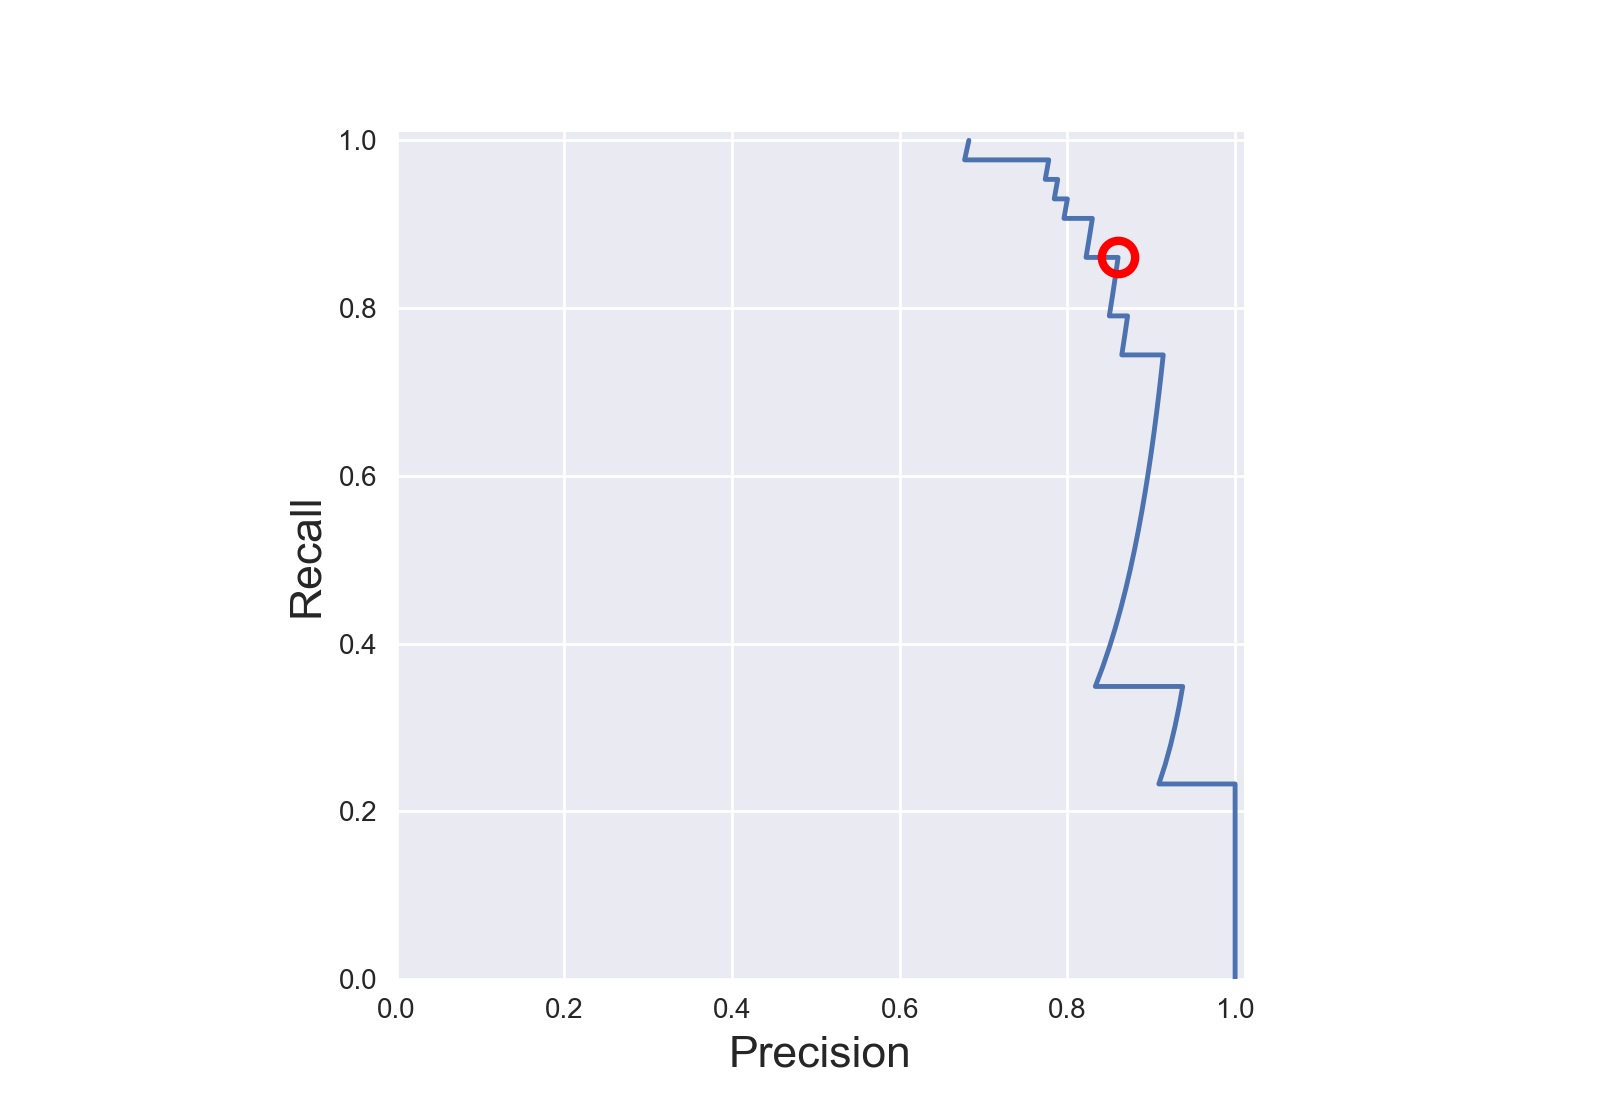

In [47]:
# Precission Vs Recall curve Logistic regression
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_scores_lr)
closest_zero = np.argmin(np.abs(thresholds))
closest_zero_p = precision[closest_zero]
closest_zero_r = recall[closest_zero]

plt.figure()
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.plot(precision, recall, label='Precision-Recall Curve')
plt.plot(closest_zero_p, closest_zero_r, 'o', markersize = 12, fillstyle = 'none', c='r', mew=3)
plt.xlabel('Precision', fontsize=16)
plt.ylabel('Recall', fontsize=16)
plt.axes().set_aspect('equal')
plt.show()

### ROC curves, Area-Under-Curve (AUC)

<IPython.core.display.Javascript object>


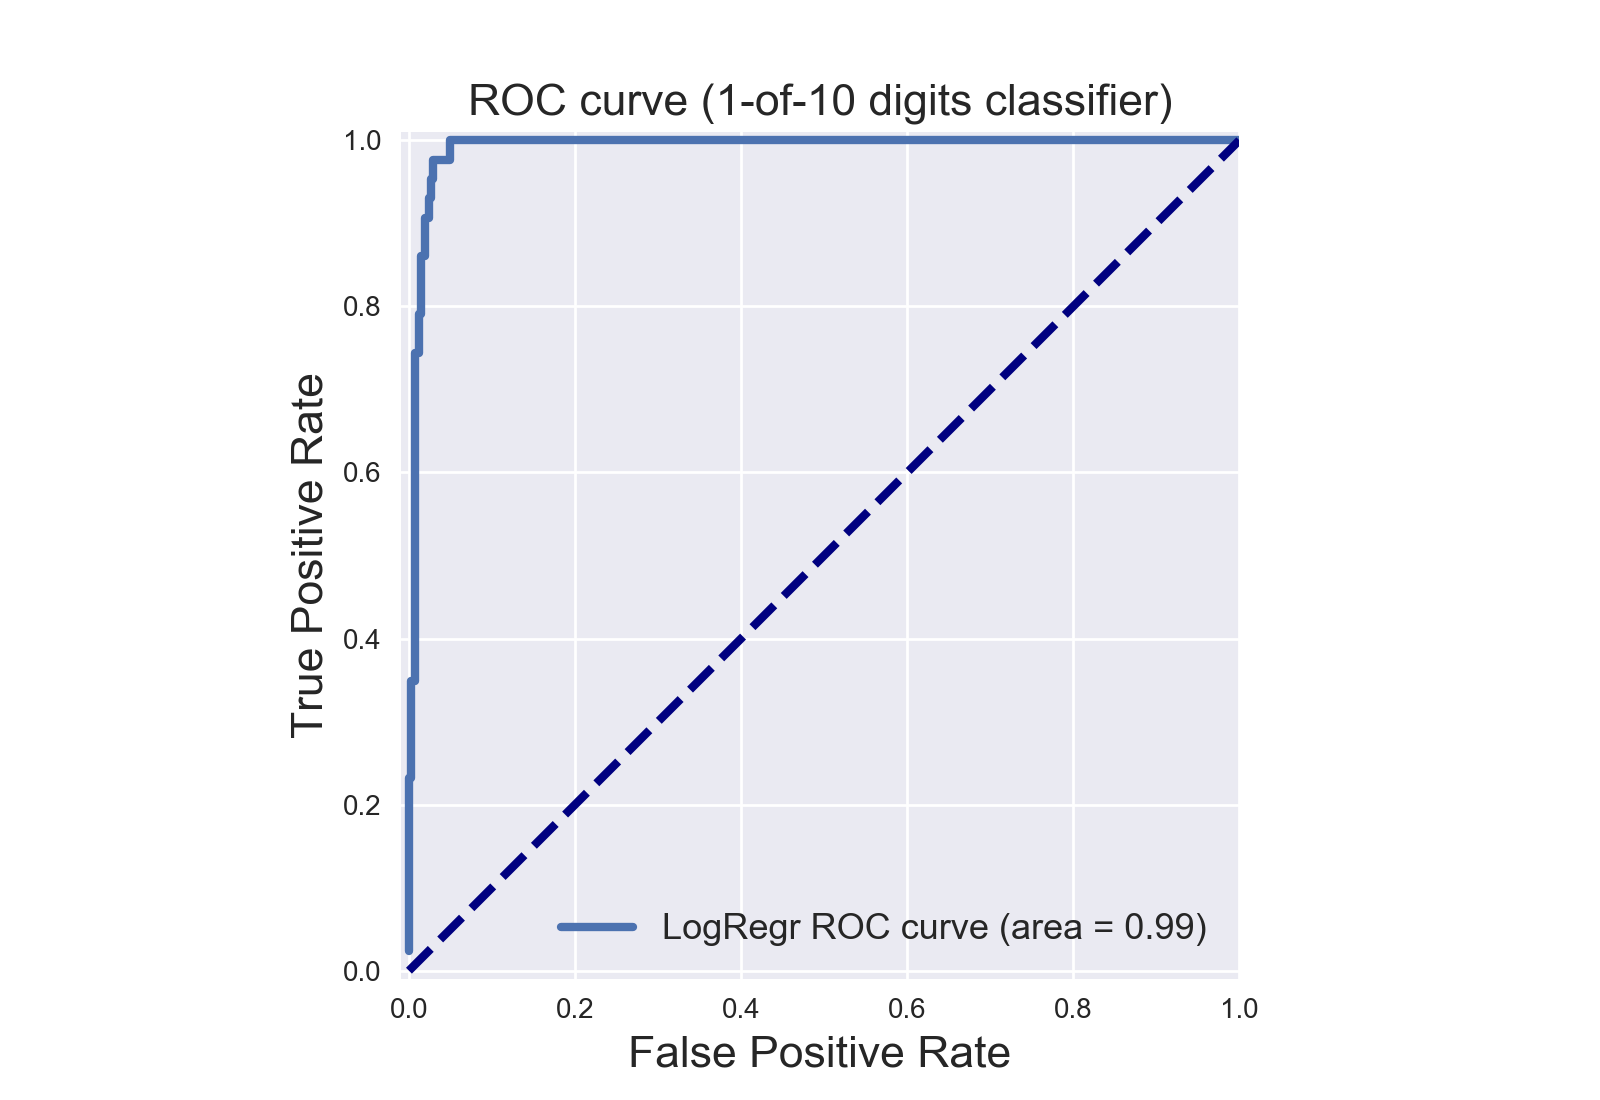

In [52]:
# Roc for binary imbalance classificator lorgistic regression
# http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html
from sklearn.metrics import roc_curve, auc

X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)

y_score_lr = lr.fit(X_train, y_train).decision_function(X_test)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_score_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_lr, tpr_lr, lw=3, label='LogRegr ROC curve (area = {:0.2f})'.format(roc_auc_lr))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve (1-of-10 digits classifier)', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.axes().set_aspect('equal')
plt.show()

<IPython.core.display.Javascript object>


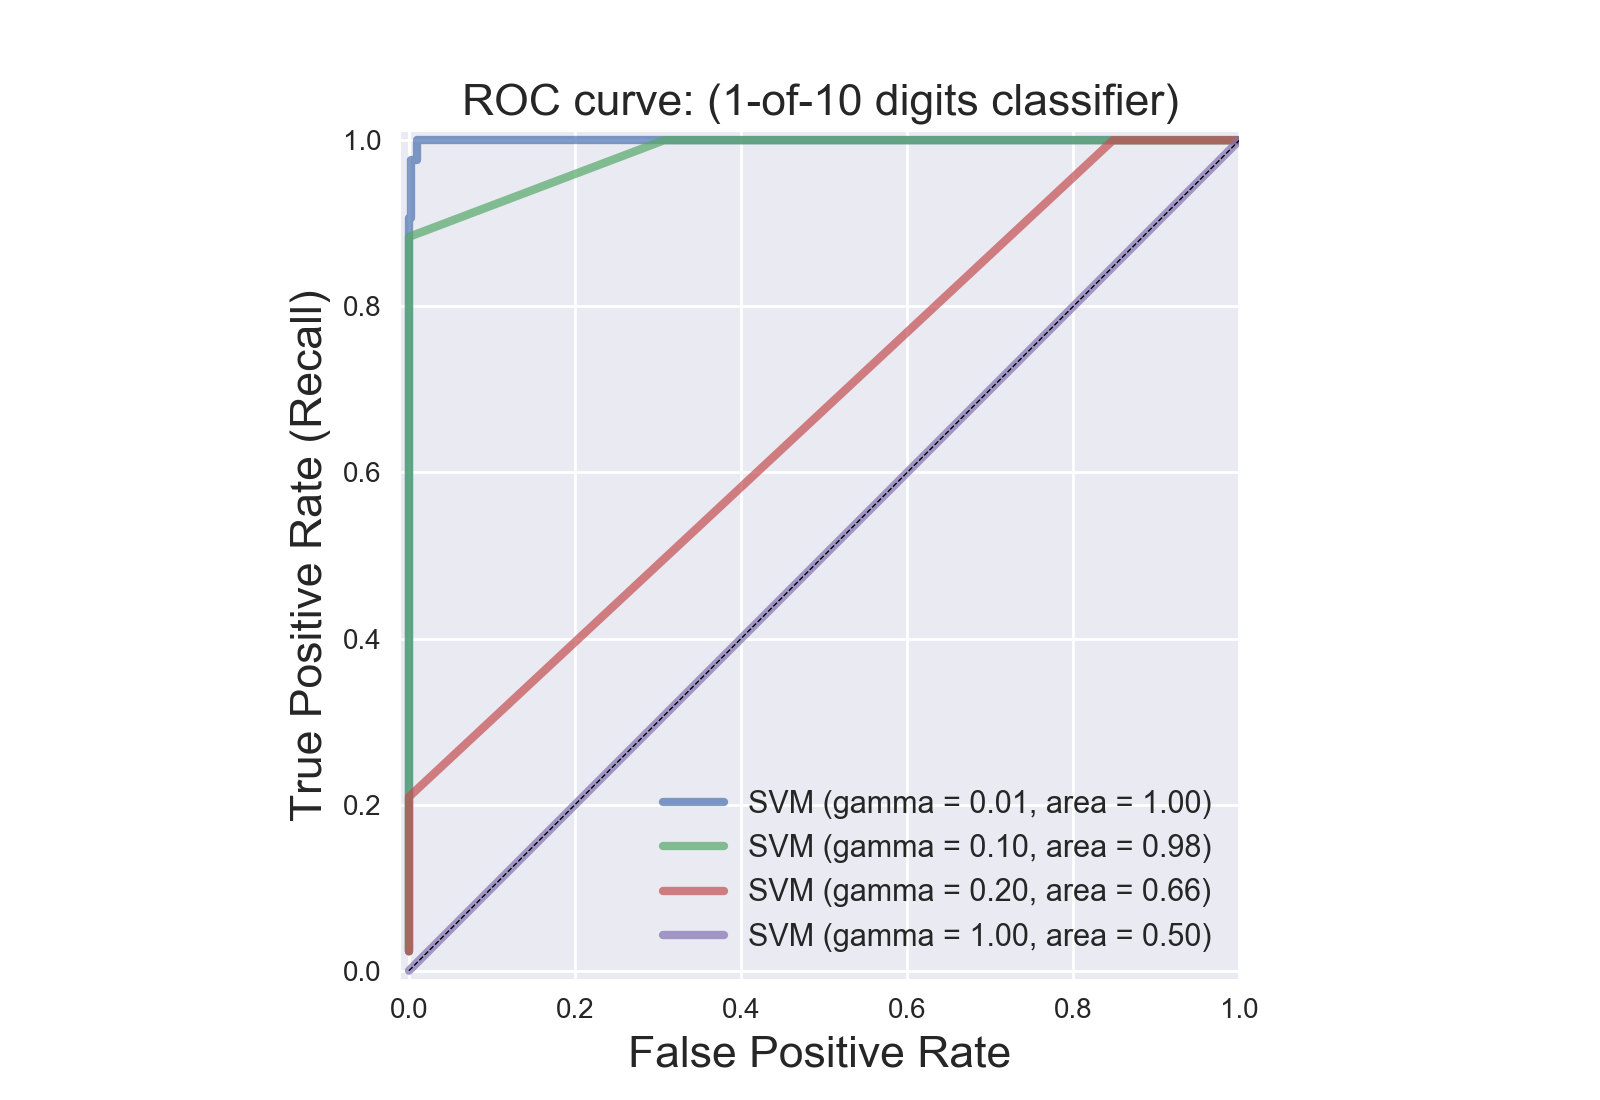

gamma = 0.01  accuracy = 0.91   AUC = 1.00
gamma = 0.10  accuracy = 0.90   AUC = 0.98
gamma = 0.20  accuracy = 0.90   AUC = 0.66
gamma = 1.00  accuracy = 0.90   AUC = 0.50


In [54]:
from matplotlib import cm

X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)

plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
for g in [0.01, 0.1, 0.20, 1]:
    svm = SVC(gamma=g).fit(X_train, y_train)
    y_score_svm = svm.decision_function(X_test)
    fpr_svm, tpr_svm, _ = roc_curve(y_test, y_score_svm)
    roc_auc_svm = auc(fpr_svm, tpr_svm)
    accuracy_svm = svm.score(X_test, y_test)
    print("gamma = {:.2f}  accuracy = {:.2f}   AUC = {:.2f}".format(g, accuracy_svm, 
                                                                    roc_auc_svm))
    plt.plot(fpr_svm, tpr_svm, lw=3, alpha=0.7, 
             label='SVM (gamma = {:0.2f}, area = {:0.2f})'.format(g, roc_auc_svm))

plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate (Recall)', fontsize=16)
plt.plot([0, 1], [0, 1], color='k', lw=0.5, linestyle='--')
plt.legend(loc="lower right", fontsize=11)
plt.title('ROC curve: (1-of-10 digits classifier)', fontsize=16)
plt.axes().set_aspect('equal')

plt.show()

### Evaluation measures for multi-class classification

Now that we've looked at evaluation of binary classifiers, let's take a look at how the more general case of multi class classification is handled in evaluation. So in may respects, **multi-class evaluation is a straightforward extension of the methods we use in binary evaluation**. Instead of two classes, we have multiple classes. So, the results for multi-class evaluation amount to a collection of true verses predicted binary outcome per class. And just as we saw in the binary case, you can generate confusion matrices in the multi-class case. They're especially useful when you have multiple classes, because there are many different kinds of errors that result from one true class being predicted as a different class. We'll look at an example of that. Classification reports that we saw in the binary case are easy to generate for the multi-class case. 

Now the one area, which is worth a little more examination is how **averaging across classes** takes place. There are different ways to average multi-class results that we'll cover shortly. And the support, the number of instances for each class is important to consider. So just as we're all interested in how to handle imbalance classes in the binary case, it's important as you will see to consider similar issues of how the support for classes might vary to a large or small extent across multiple classes. 

There is a case of **multi-label classification** in which each instance could have multiple labels. For example, a web page might be labeled with different topics that come from a predefined set of areas of interest. We won't cover multi-label classification in this lecture. Instead, we'll focus exclusively on multi-class evaluation. The multi-class confusion matrix is a straightforward extension of the binary classifier two by two confusion matrix. 

<img src="module3_multiclass_1.png" alt="jupyter" style="width: 600px;"/> 

For example, in our digits data set, there are ten classes for the digits, zero through nine. So, the ten class confusion matrix is a ten by ten matrix with the true digit class indexed by row and the predicted digit class indexed by column. As with the two by two case, the correct prediction is by the classifier where the **true class matches the predicted class are all along the diagonal and misclassifications are off the diagonal**. 

<img src="module3_multiclass_2.png" alt="jupyter" style="width: 600px;"/> 

#### Multi-class confusion matrix

In this example which was created using the following notebook code based on a support vector classifier with linear kernel, we can see that most of the predictions are correct with only a few misclassifications here and there. The most frequent type of mistake here is apparently misclassifying the true digit, eight as a predicted digit one which happened three times. 

And indeed, the overall accuracy is high, about 97% as shown here. As an aside, it's sometimes useful to display a confusion matrix as a heat map in order to highlight the relative frequencies of different types of errors. So, I've included the code to generate that here. For comparison, I've also included a second confusion matrix on the same dataset for another support vector classifier that does much worse in a distinctive way. The only change is to use an RBF, radial basis function kernel instead of a linear kernel. While we can see for the accuracy number were about 43% below the confusion matrix that the classifier is doing much worse than the linear kernel, that single number doesn't give much insight into why. 

Looking at the confusion matrix, however, reveals that for every true digit class, a significant fraction of outcomes are to predict the digit four. That's rather surprising. For example, of the 44 instances of the true digit 2 in row 2, 17 are classified correctly, but 27 are classified as the digit 4. Clearly, something is broken with this model and I picked this second example just to show an extreme example of what you might see when things go quite wrong. This digits dataset is well-established and free of problems. But especially when developing with a new dataset, seeing patterns like this in a confusion matrix could give you valuable clues about possible problems, say in the feature pre-processing for example. **So as a general rule of thumb as part of model evaluation, I suggest always looking at the confusion matrix for your classifier. To get some insight into what kind of errors it is making for each class including whether some classes are much more prone to certain kinds of errors than others**. 

<IPython.core.display.Javascript object>


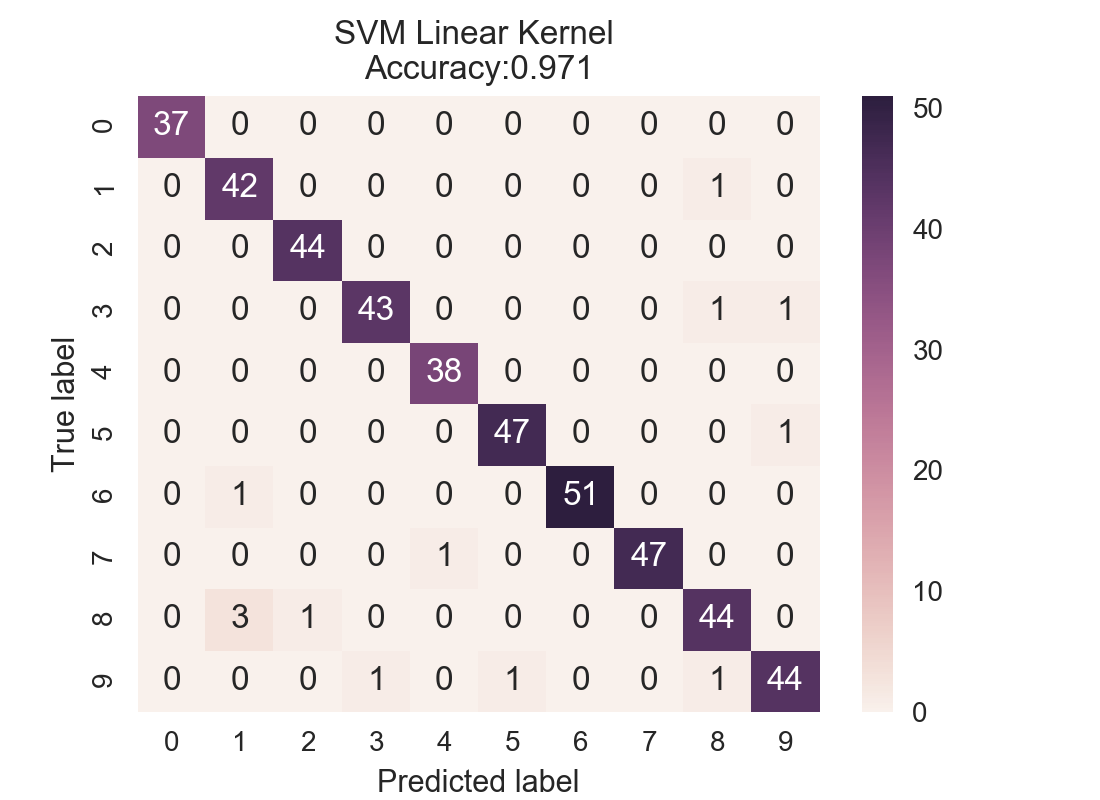

<IPython.core.display.Javascript object>


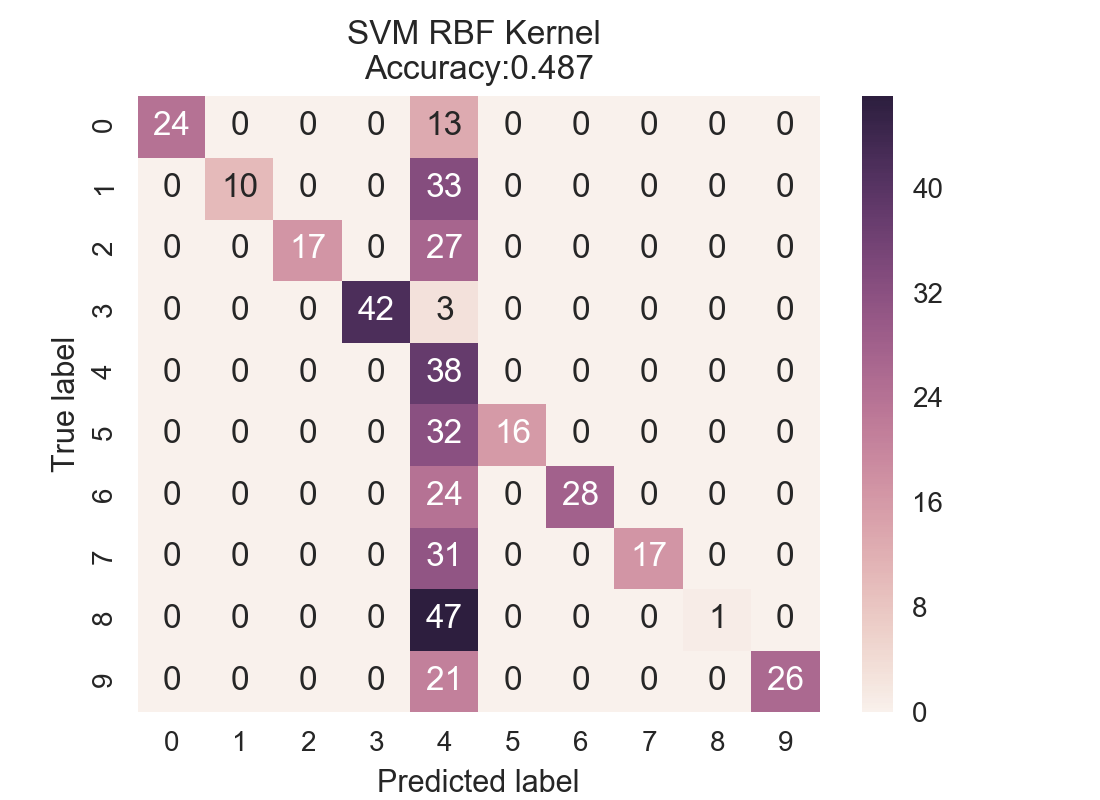

In [55]:
dataset = load_digits()
X, y = dataset.data, dataset.target
X_train_mc, X_test_mc, y_train_mc, y_test_mc = train_test_split(X, y, random_state=0)


svm = SVC(kernel = 'linear').fit(X_train_mc, y_train_mc)
svm_predicted_mc = svm.predict(X_test_mc)
confusion_mc = confusion_matrix(y_test_mc, svm_predicted_mc)
df_cm = pd.DataFrame(confusion_mc, 
                     index = [i for i in range(0,10)], columns = [i for i in range(0,10)])

plt.figure(figsize=(5.5,4))
sns.heatmap(df_cm, annot=True)
plt.title('SVM Linear Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test_mc, 
                                                                       svm_predicted_mc)))
plt.ylabel('True label')
plt.xlabel('Predicted label')


svm = SVC(kernel = 'rbf').fit(X_train_mc, y_train_mc)
svm_predicted_mc = svm.predict(X_test_mc)
confusion_mc = confusion_matrix(y_test_mc, svm_predicted_mc)
df_cm = pd.DataFrame(confusion_mc, index = [i for i in range(0,10)],
                  columns = [i for i in range(0,10)])

plt.figure(figsize = (5.5,4))
sns.heatmap(df_cm, annot=True)
plt.title('SVM RBF Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test_mc, 
                                                                    svm_predicted_mc)))
plt.ylabel('True label')
plt.xlabel('Predicted label');

#### Multi-class classification report

Next, just as in the binary case, you can get a classification report that summarizes multiple evaluation metrics for a multi-class classifier with an average metric computed for each class. 

In [61]:
print(classification_report(y_test_mc, svm_predicted_mc))

             precision    recall  f1-score   support

          0       1.00      0.65      0.79        37
          1       1.00      0.23      0.38        43
          2       1.00      0.39      0.56        44
          3       1.00      0.93      0.97        45
          4       0.14      1.00      0.25        38
          5       1.00      0.33      0.50        48
          6       1.00      0.54      0.70        52
          7       1.00      0.35      0.52        48
          8       1.00      0.02      0.04        48
          9       1.00      0.55      0.71        47

avg / total       0.93      0.49      0.54       450



#### Micro- vs. macro-averaged metrics

Now what I'm about to describe, also applies to the binary class case, but it's easier to see when looking at multi-class classification problem with several classes. So, here's an example of how to **compute macro-average precision and micro-average precision** on a sample dataset that I have extracted from our fruit dataset. In this example, we have three columns where the **first column is the true class** of an example. The **second column is the predictive class** from some classifier and the **third column is a binary variable** that denotes whether the predictive class matches the two class. 

And here, we have in our, this is a multi-class classification problem. And so, we have three classes here. We have several instances there, the orange class. We have two instances that are the lemon class and we have two instances that are the apple class. So in this first example, we'll compute macro-average precision and **the key aspect of macro-average precision is that each class has equal weight. So in this case, each of these classes will contribute one-third weight towards the final macro-average precision value**. 

So, there are two steps to **compute macro-average precision**. 

* The first one is to compute the metric. So in this case, we're going to compute precision within each class. So, let's take a look at the orange class. There are five total examples in the orange class and only one of them was predicted correctly by the classifier. And so, that leads to a precision for the orange class of 1 out of 5 or 0.20. For the second class, the lemon class. There are a total of two instances and only one of them was predicted correctly, and that leads to a precision of one-half or 0.50 for the lemon class. Let's write the precision for each of the classes that we have calculated. And for the third class, the apple class. The classifier predicted both of these correctly. So, that's a precision of 2 out of 2 or 1.0. That's the first step. We've computed the precision metric within each class.

* And then in the second step, we simply average across these three to produce the final result, to get our final macro-average precision. And so we can simply compute the average of 0.2, 0.5 and 1 and we get our final macro-average precision for this set of results of 0.57. You'll notice here that no matter how many instances they were in each class, because we computed position within each class first, each class contributes equally to the overall macro-average. So we could have had, for example, a million examples and from the orange class. But that class would have still been weighted equally, because we would have first computed precision for the million orange examples and then that number would still get a third of the weight compared to the other two classes. So, that's macro-average precision. 

<img src="module3_multiclass_3.png" alt="jupyter" style="width: 600px;"/> 

**Micro-average precision is computed a little differently and it gives each instance in the data results here equal weight**. In micro-average precision, we don't compute precision for each class separately. We treat the entire dataset, the entire set of results here as an aggregate outcome. So to compute micro-average precision, we simply look at how many of all the examples. We have nine examples here in total and micro-average precision will simply compute the precision for all the examples, regardless of class in the set of results. So out of these nine instances, we have found that the classifier predicted four of them correctly. 

And so, the micro-average precision is simply computed as 4/9 or 0.44. And you'll notice here that if we had a million instances of the orange class, for example, that with micro-average precision, because each instance has equal weight. That would lead to the orange class contributing many, many more instances to our overall micro-average precision. And so, the effect of micro-average precision is to give classes with a lot more instances much more influence. *So, the average here would have been influenced much more by the million orange examples than by the two lemon and apple examples*. 

<img src="module3_multiclass_4.png" alt="jupyter" style="width: 600px;"/> 

And so, that is the **difference between micro and macro-average precision**: 

* If the classes have about the **same number of instances, macro and micro-average will be about the same**. 
* If **some classes are much larger**, have more instances than others and **you want to weight your metric toward the largest ones, use micro-averaging**. 
* If you want to **weight your metric towards the smallest classes, use macro-averaging**. 
* If the micro-average is much lower than the macro-average, then examine the larger classes for poor metric performance. 
* If the macro-average is much lower than the micro-average, then you should examine the smaller classes to see why they have poor metric performance.

<img src="module3_multiclass_5.png" alt="jupyter" style="width: 600px;"/> 

Here, we use the average parameter on the scoring function. In the first example, we used the precision metric and specify whether we want micro-average precision which is the first case or macro-average precision in the second case. 

In [62]:
print('Micro-averaged precision = {:.2f} (treat instances equally)'
      .format(precision_score(y_test_mc, svm_predicted_mc, average = 'micro')))
print('Macro-averaged precision = {:.2f} (treat classes equally)'
      .format(precision_score(y_test_mc, svm_predicted_mc, average = 'macro')))

Micro-averaged precision = 0.49 (treat instances equally)
Macro-averaged precision = 0.91 (treat classes equally)


In the second example, we use the f1 metric and compute micro and macro-averaged f1. 
Now that we've seen how to compute these metrics, let's take a look at how to use them to do model selection. 

In [63]:
print('Micro-averaged f1 = {:.2f} (treat instances equally)'
      .format(f1_score(y_test_mc, svm_predicted_mc, average = 'micro')))
print('Macro-averaged f1 = {:.2f} (treat classes equally)'
      .format(f1_score(y_test_mc, svm_predicted_mc, average = 'macro')))

Micro-averaged f1 = 0.49 (treat instances equally)
Macro-averaged f1 = 0.54 (treat classes equally)


### Regression evaluation metrics

We saw that for classification, because there were some scenarios like medical diagnostics predictions or costumer facing web site features, where the consequences of false positive were very different than false negatives. It made sense to distinguish these types of errors and do a more detailed analysis. In evaluating classifiers for example we looked at plots like precision recall curves that could show the trade offs a classifier could achieve between making errors of those two types. 

In theory, we could apply the same type of error analysis and more detailed evaluation to regression that we applied for classification. For example, we could analyze the regression model's predictions, and categorize errors of one type. Where the regression model's predicted value was much larger than the target value. Compared to a second error type, where the predicted value was much smaller than the target value. 

In practice though it turns out that for most applications of regression, distinguishing between these types of different errors is not as important. This simplifies evaluation for regression quite a bit. 

* In most cases, the default r squared score that's available for regression and psychic learn and that summarizes how well future instances will be predicted. It's adequate for most tasks.  As a reminder, the r2_score for perfect predictor is 1.0. And for a predictor that always output the same constant value, the r2_score is 0.0. 

* The r2_score despite the squared in the name that suggests it's always positive does have the potential to go negative for bad model fits, such as when fitting non-linear functions to data. 

There are a few alternative regression devaluation metrics you should be aware of that work differently than the r2_score. 
* Mean absolute error (MAE) takes the mean absolute difference between the target and predicted values. In machine running terms this corresponds to the expected value of L1 norm laws. This is sometimes used for example to asses focused outcomes for regression in time series analysis. 
* Mean squared error (MSE) takes the mean squared difference between the target and predicted values and this corresponds to the expected value of the L2 norm loss. This is widely used for many regression problems and larger errors have correspondingly larger squared contributions to the mean error. 

Like mean absolute error, mean squared error doesn't distinguish between over and under estimates. Finally one situation that does arise quite often, is the existence of outliers in the data, which can have unwanted influence on the overall r squared or mean squared value. So in those cases, **when ignoring outlier is important, you can use the mean_absolute_error score, which is robust with the presence of outliers because it uses the median of the error distribution rather than the mean**. 

<img src="module3_regeval_1.png" alt="jupyter" style="width: 600px;"/> 

We saw how using how **dummy classifiers** could give us simple but useful baselines to compared against when evaluating a classifier. The same functionality exist for regression. There's a **dummy regressor class** that provides predictions using simple strategies that do not look at the input data. This example which is available as the regression example from this lecture's notebook shows a scatter plot using database on a single input variable, which is plotted along the x axis from the diabetes data set. The points are the data instances from the test split and form a cloud that looks like it may trend down slightly to the right. 

<img src="module3_regeval_2.png" alt="jupyter" style="width: 600px;"/> 

The green line, which is also labeled fitted model is the default linear regression that was fit to the training points. We can see that it’s not a particularly strong fit to the test data. The red line labeled dummy mean, shows a linear model that uses the strategy of always predicting the mean of the training data. So this is an example of a dummy regressor. 

<img src="module3_regeval_3.png" alt="jupyter" style="width: 600px;"/> 

You can look at the notebook to see that a dummy regressor is created and used just like a regular regression model. You create, fit with the training data, and then call predict on the test data. Although again, like the dummy classifier you should not use the dummy regressor for actual problems. Its only use is to provide a baseline for comparison. 

Looking at the regression metrics output from the linear model compared to the dummy model. We can see that as expected the dummy regressor achieves an r squared score of 0. Since it always makes a constant prediction without looking at the output. In this instance the linear model provides only slightly better fit than the dummy regressor, according to both mean squared error and the r2_score. 

Linear model, coefficients:  [-698.80206267]
Mean squared error (dummy): 4965.13
Mean squared error (linear model): 4646.74
r2_score (dummy): -0.00
r2_score (linear model): 0.06


/Users/starignus/.virtualenvs/v35/lib/python3.5/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


<IPython.core.display.Javascript object>


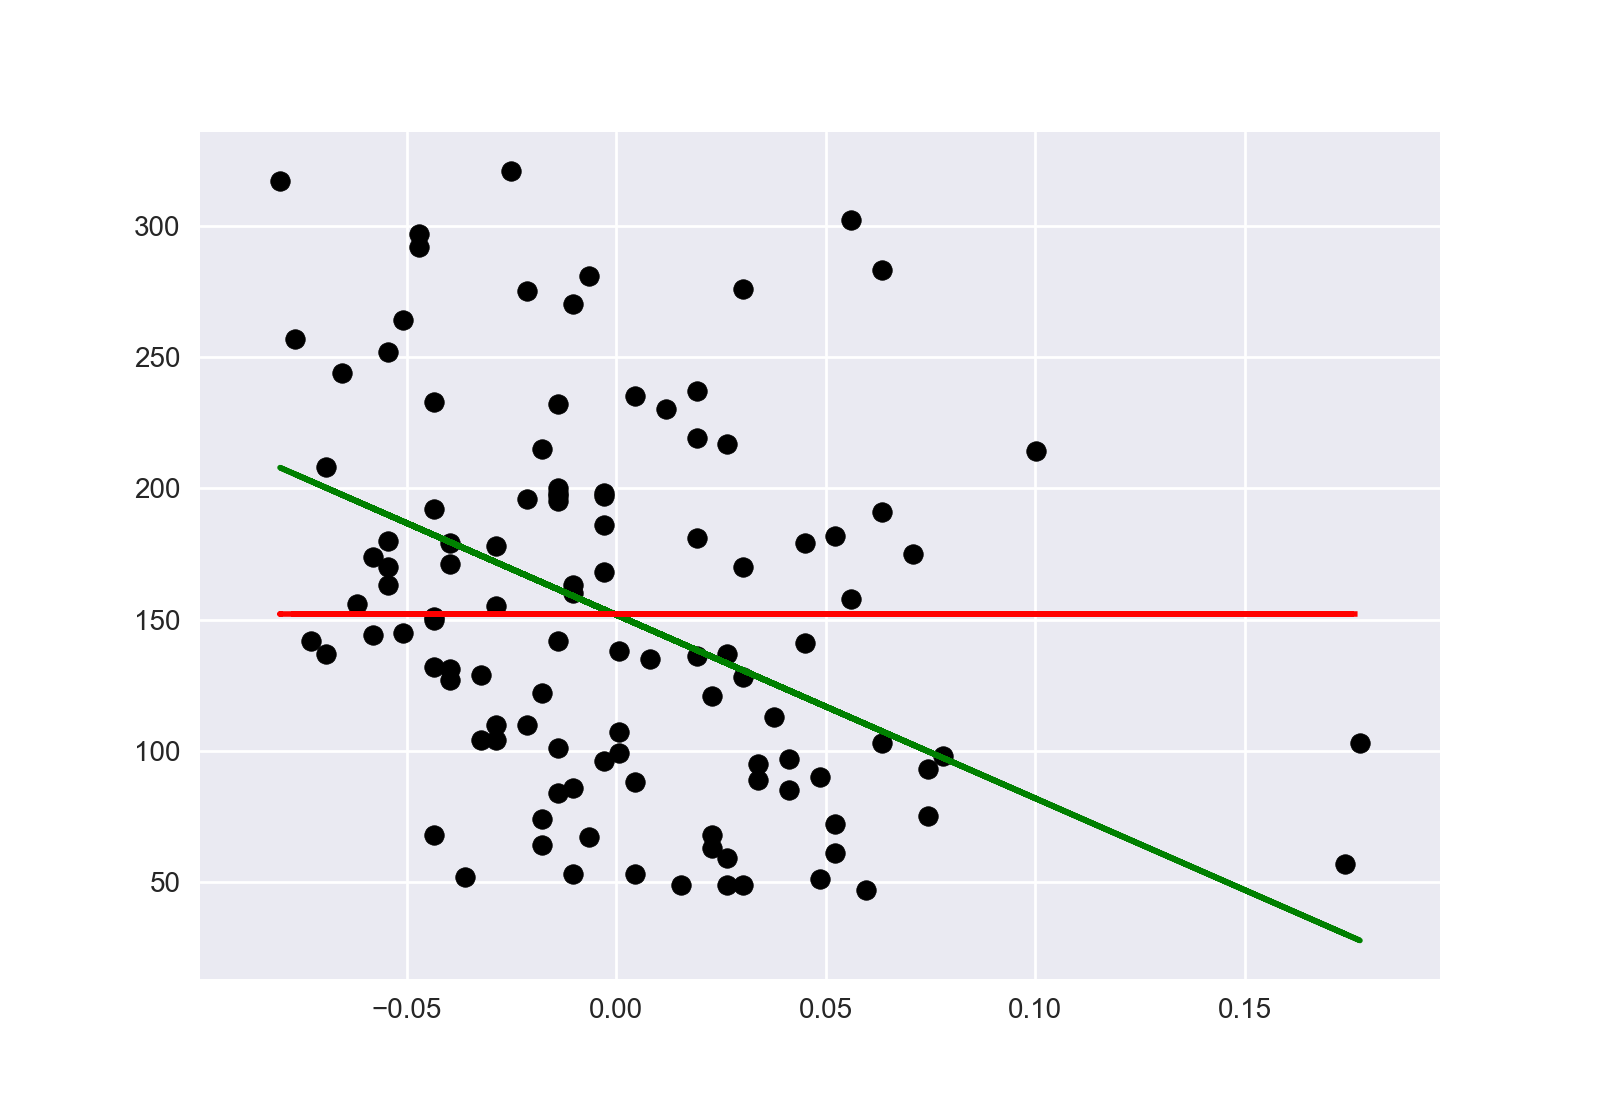

In [64]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.dummy import DummyRegressor

diabetes = datasets.load_diabetes()
#this is the sames as: diabetes.data[:, 6:7]
X = diabetes.data[:, None, 6]
y = diabetes.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

lm = LinearRegression().fit(X_train, y_train)
lm_dummy_mean = DummyRegressor(strategy = 'mean').fit(X_train, y_train)

y_predict = lm.predict(X_test)
y_predict_dummy_mean = lm_dummy_mean.predict(X_test)

print('Linear model, coefficients: ', lm.coef_)
print("Mean squared error (dummy): {:.2f}".format(mean_squared_error(y_test, 
                                                                     y_predict_dummy_mean)))
print("Mean squared error (linear model): {:.2f}".format(mean_squared_error(y_test, y_predict)))
print("r2_score (dummy): {:.2f}".format(r2_score(y_test, y_predict_dummy_mean)))
print("r2_score (linear model): {:.2f}".format(r2_score(y_test, y_predict)))

# Plot outputs
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_predict, color='green', linewidth=2)
plt.plot(X_test, y_predict_dummy_mean, color='red', linestyle = 'dashed', 
         linewidth=2, label = 'dummy')

plt.show()

Aside from the strategy of always predicting the mean of the training target values, you could also create some other flavors of dummy regressors that always predict the median of the training target values, or a particular quantile of those values, or a specific custom constant value that you provide. 

Although regression typically has simpler evaluation needs than classification, it does pay to double check to make sure the evaluation metric you choose for a regression problem does penalize errors in a way that reflects the consequences of those errors for the business, organizational, or user needs of your application. 

<img src="module3_regeval_4.png" alt="jupyter" style="width: 600px;"/> 

Beyond the essential evaluation metrics covered in this course, online controlled experiments, which involve A-B testing and other techniques, are perhaps the most important way that machine learning algorithms are evaluated for real-world use in Web and other online applications. This article by Ron Kohavi, Randal Henne, and Dan Sommerfield, reviews the key points of running controlled experiments, along with important engineering issues and limitations to keep in mind when using them.

Kohavi, R., Henne, R. M., & Sommerfield, D. (2007). [Practical guide to controlled experiments on the web](2007GuideControlledExperiments.pdf) or [link](https://ai.stanford.edu/~ronnyk/2007GuideControlledExperiments.pdf). Proceedings of the 13th ACM SIGKDD international conference on Knowledge discovery and data mining - KDD '07. doi:10.1145/1281192.1281295

### Model selection using evaluation metrics

Know that you've seen a number of different evaluation metrics for both binary and multiclass classification, let's take a look at how you can apply them as criteria for selecting the best classifier for your application, otherwise known as model selection. In previous lectures, we've seen a number of different evaluation frameworks for potential model selection. 

* First, we simply did training and testing on the same dataset which as we well know typically over fits badly and doesn't generalize well to new data. As a side note however, it can serve as a useful sanity check to make sure your software engineering and feature generation pipeline is working correctly. 

* Second, we frequently use the single train test split to produce a single evaluation metric. While fast and easy, this doesn't give as realistic a set of estimates for how well the model may work on future new data and we don't get a good picture for the variance in the evaluation metrics that may result as we do prediction on different test sets.

* Third, we used Kfold cross-validation to create K random train test splits, where the evaluation metric was average across splits. This leads to models that are more reliable and unseen data. In particular, we can also use **grid search** using for example the grid search CV method with **within each cross-validation fold to find optimal parameters for a model with respect to the evaluation metric**. The default evaluation metric used for cross value score or grid search CV is accuracy. So, how do you apply the new metrics you've learned about here like AUC in model selection? Sklearn makes this very easy. You simply add a scoring parameter that set the string with the name of the evaluation metric you want to use.

<img src="module3_modelselec_1.png" alt="jupyter" style="width: 600px;"/> 


#### Cross-validation example

Let's first look an example using the **scoring parameter for cross-validation** and then we'll take a look at the other primary method of model selection **grid search**. In the notebook here, we have a cross-validation example where we're running five folds using a support vector classifier (SVC) with the linear kernel and C parameter set to 1. 

The first call to cross validations score just uses default accuracy as the evaluation metric. The second call, uses the scoring parameter using the string Orosi underscore AUC. And this will use AUC as the evaluation metric. The third call, sets the scoring parameter to recall to use that as the evaluation metric. You can see the resulting list of five evaluation values one per fold for each metric. Now you are not doing any parameter tuning, we're simply evaluating our models average performance across multiple folds. 

In [96]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

dataset = load_digits()
# again, making this a binary problem with 'digit 1' as positive class 
# and 'not 1' as negative class
X, y = dataset.data, dataset.target == 1
clf = SVC(kernel='linear', C=1)

# accuracy is the default scoring metric
print('Cross-validation (accuracy)', cross_val_score(clf, X, y, cv=5))
# use AUC as scoring metric
print('Cross-validation (AUC)', cross_val_score(clf, X, y, cv=5, scoring = 'roc_auc'))
# use recall as scoring metric
print('Cross-validation (recall)', cross_val_score(clf, X, y, cv=5, scoring = 'recall'))

Cross-validation (accuracy) [ 0.91944444  0.98611111  0.97214485  0.97493036  0.96935933]
Cross-validation (AUC) [ 0.9641871   0.9976571   0.99372205  0.99699002  0.98675611]
Cross-validation (recall) [ 0.81081081  0.89189189  0.83333333  0.83333333  0.83333333]


#### Grid search example

Now in this grid search example, we use a support vector classifier that uses a radio basis function kernel(RBF). When the critical parameter here is the **gamma parameter that intuitively sets the radius or width of influence of the kernel**. We use a [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) to **find the value of gamma that optimizes the given evaluation metric** in two cases: In the first case, we just optimize for average accuracy. In the second case, we optimize for AUC. 

In this particular case, the optimal value of gamma happens to be the same point 0.01 for both evaluation metric but as we'll see later in other cases the optimal parameter value can be quite different depending on the evaluation metric used to optimize.

In [97]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

dataset = load_digits()
X, y = dataset.data, dataset.target == 1
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

clf = SVC(kernel='rbf')
grid_values = {'gamma': [0.001, 0.01, 0.05, 0.1, 1, 10, 100]}

# default metric to optimize over grid parameters: accuracy
grid_clf_acc = GridSearchCV(clf, param_grid = grid_values)
grid_clf_acc.fit(X_train, y_train)
y_decision_fn_scores_acc = grid_clf_acc.decision_function(X_test) 

print('Grid best parameter (max. accuracy): ', grid_clf_acc.best_params_)
print('Grid best score (accuracy): ', grid_clf_acc.best_score_)

# alternative metric to optimize over grid parameters: AUC
grid_clf_auc = GridSearchCV(clf, param_grid = grid_values, scoring = 'roc_auc')
grid_clf_auc.fit(X_train, y_train)
y_decision_fn_scores_auc = grid_clf_auc.decision_function(X_test) 

print('Test set AUC: ', roc_auc_score(y_test, y_decision_fn_scores_auc))
print('Grid best parameter (max. AUC): ', grid_clf_auc.best_params_)
print('Grid best score (AUC): ', grid_clf_auc.best_score_)


Grid best parameter (max. accuracy):  {'gamma': 0.001}
Grid best score (accuracy):  0.996288047513
Test set AUC:  0.999828581224
Grid best parameter (max. AUC):  {'gamma': 0.001}
Grid best score (AUC):  0.99987412783


#### Evaluation metrics supported for model selection
You can see the complete list of names for the evaluation metric supported by the scoring parameter by running the following code that uses the score's variable imported from sklearn metrics. You can see metrics for classification such as the string ``precision_micro`` that represents micro or average precision as well as metrics for regression such as the R2 metric for R-squared regression loss. 

In [98]:
from sklearn.metrics.scorer import SCORERS

print(sorted(list(SCORERS.keys())))

['accuracy', 'adjusted_rand_score', 'average_precision', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'log_loss', 'mean_absolute_error', 'mean_squared_error', 'median_absolute_error', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_median_absolute_error', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc']


### Two-feature classification example using the digits dataset

Let's take a look at a specific example that shows how a classifiers decision boundary changes when it's optimized for different evaluation metrics. This classification problem is based on the same binary digit classifier training and test sets we've been using as an example throughout the notebook. In this classification visualization examples the **positive examples the digit 1** are shown as **black points** and the **region of positive class prediction is shown in the light colored or yellow region to the right of the decision boundary**. The **negative examples**, all other digits **are shown as white points and the region of negative classed prediction** here and these figures **is to the left of the decision boundary**. The data points have been plotted using two out of the 64 feature values in the digits dataset and have been jittered a little. That is, about a little bit of random noise so we can see more easily the density of examples in the feature space. 

Here's the sklearn code that produced this figure. We apply grid search here to explore different values of the optional class weight parameter that controls how much weight is given to each of the two classes during training. As it turns out, optimizing for different evaluation metrics results in different optimal values of the class weight parameter. As a class weight parameter increases more emphasis will be given to correctly classifying the positive class instances. The **precision oriented classifier** we see here with class weight of two **tries hard to reduce false positive while increasing true positives**. So it focuses on the cluster of positive class points in the lower right corner where there are relatively few negative class points. Here, precision is over 50 percent. In contrast, the **recall oriented classifier** with class way to 50, **tries hard to reduce the number of false negatives while increasing true positives**. That is, it tries to find most of the positive class points as part of its positive class predictions. 

We can also see that the decision boundary for the F1 oriented classifier has an optimal class weight of two which is between the optimal class weight values for the precision and recall oriented classifiers. Visually, we can see that the F1 oriented classifier also has a kind of intermediate positioning between the precision and recall oriented decision boundaries. This makes sense given that F1 is the harmonic mean of precision and recall. The AUC oriented classifier with optimal class weight of 5, has a similar decision boundary to the F1 oriented classifier but shifted slightly in favor of higher recall. 
<img src="module3_modelselec_2.png" alt="jupyter" style="width: 600px;"/> 


#### Optimizing a classifier using different evaluation metrics

<IPython.core.display.Javascript object>


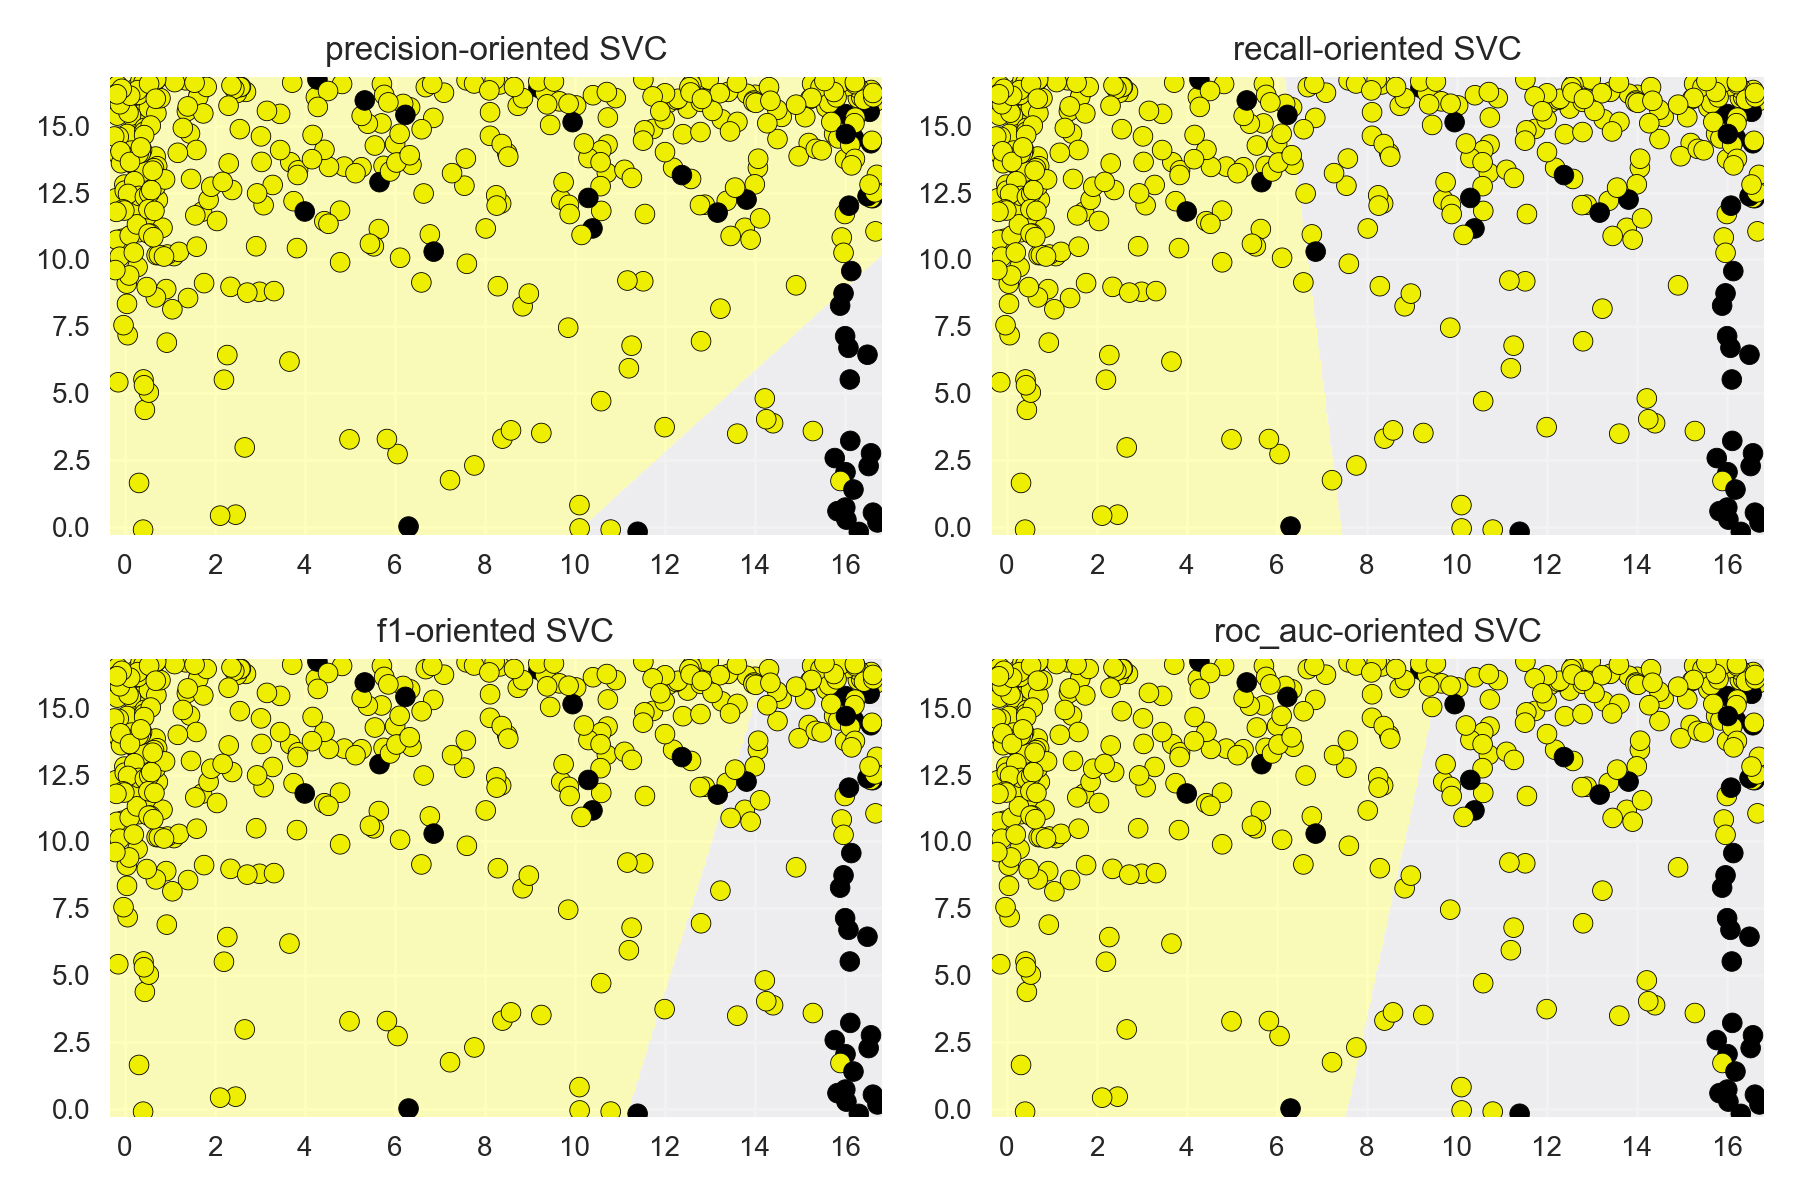

Grid best parameter (max. precision): {'class_weight': {1: 2}}
Grid best score (precision): 0.541359211142638
Grid best parameter (max. recall): {'class_weight': {1: 50}}
Grid best score (recall): 0.935661321592438
Grid best parameter (max. f1): {'class_weight': {1: 4}}
Grid best score (f1): 0.5184563510297097
Grid best parameter (max. roc_auc): {'class_weight': {1: 20}}
Grid best score (roc_auc): 0.8900651570933926


In [99]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV


dataset = load_digits()
X, y = dataset.data, dataset.target == 1
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Create a two-feature input vector matching the example plot above
# We jitter the points (add a small amount of random noise) in case there are areas
# in feature space where many instances have the same features.
jitter_delta = 0.25
X_twovar_train = X_train[:,[20,59]] + np.random.rand(X_train.shape[0], 2) - jitter_delta
X_twovar_test  = X_test[:,[20,59]] + np.random.rand(X_test.shape[0], 2) - jitter_delta

clf = SVC(kernel = 'linear').fit(X_twovar_train, y_train)
grid_values = {'class_weight':['balanced', {1:2},{1:3},{1:4},{1:5},{1:10},{1:20},{1:50}]}
plt.figure(figsize=(9,6))
for i, eval_metric in enumerate(('precision','recall', 'f1','roc_auc')):
    grid_clf_custom = GridSearchCV(clf, param_grid=grid_values, scoring=eval_metric)
    grid_clf_custom.fit(X_twovar_train, y_train)
    print('Grid best parameter (max. {0}): {1}'
          .format(eval_metric, grid_clf_custom.best_params_))
    print('Grid best score ({0}): {1}'
          .format(eval_metric, grid_clf_custom.best_score_))
    plt.subplots_adjust(wspace=0.3, hspace=0.3)
    plot_class_regions_for_classifier_subplot(grid_clf_custom, X_twovar_test, y_test, None,
                                             None, None,  plt.subplot(2, 2, i+1))
    
    plt.title(eval_metric+'-oriented SVC')
plt.tight_layout()
plt.show()

#### Precision-recall curve for the default SVC classifier (with balanced class weights)

We can see the precision recall tradeoff very clearly for this classification scenario in the precision recall curve for the default for vector classifier with linear kernel optimized for accuracy on the same dataset and using the balanced option for the class parameter. Let's take a look at the code that generated this plot.

<img src="module3_modelselec_3.png" alt="jupyter" style="width: 600px;"/> 

Take a moment to imagine how the extreme lower right part of the curve on this precision recall curve represents a decision boundary that's highly precision oriented. In the lower right of the classification plot where there's a cluster of positive examples. As the decision threshold is shifted to become less and less conservative, tracing the curve up into the left, the classifier becomes more and more like the recall oriented support vector classifier example. **Again, the red circle represents the precision recall tradeoff achieved at the zero score mark, which is the actual decision boundary chosen for the trained classifier**. 

<IPython.core.display.Javascript object>


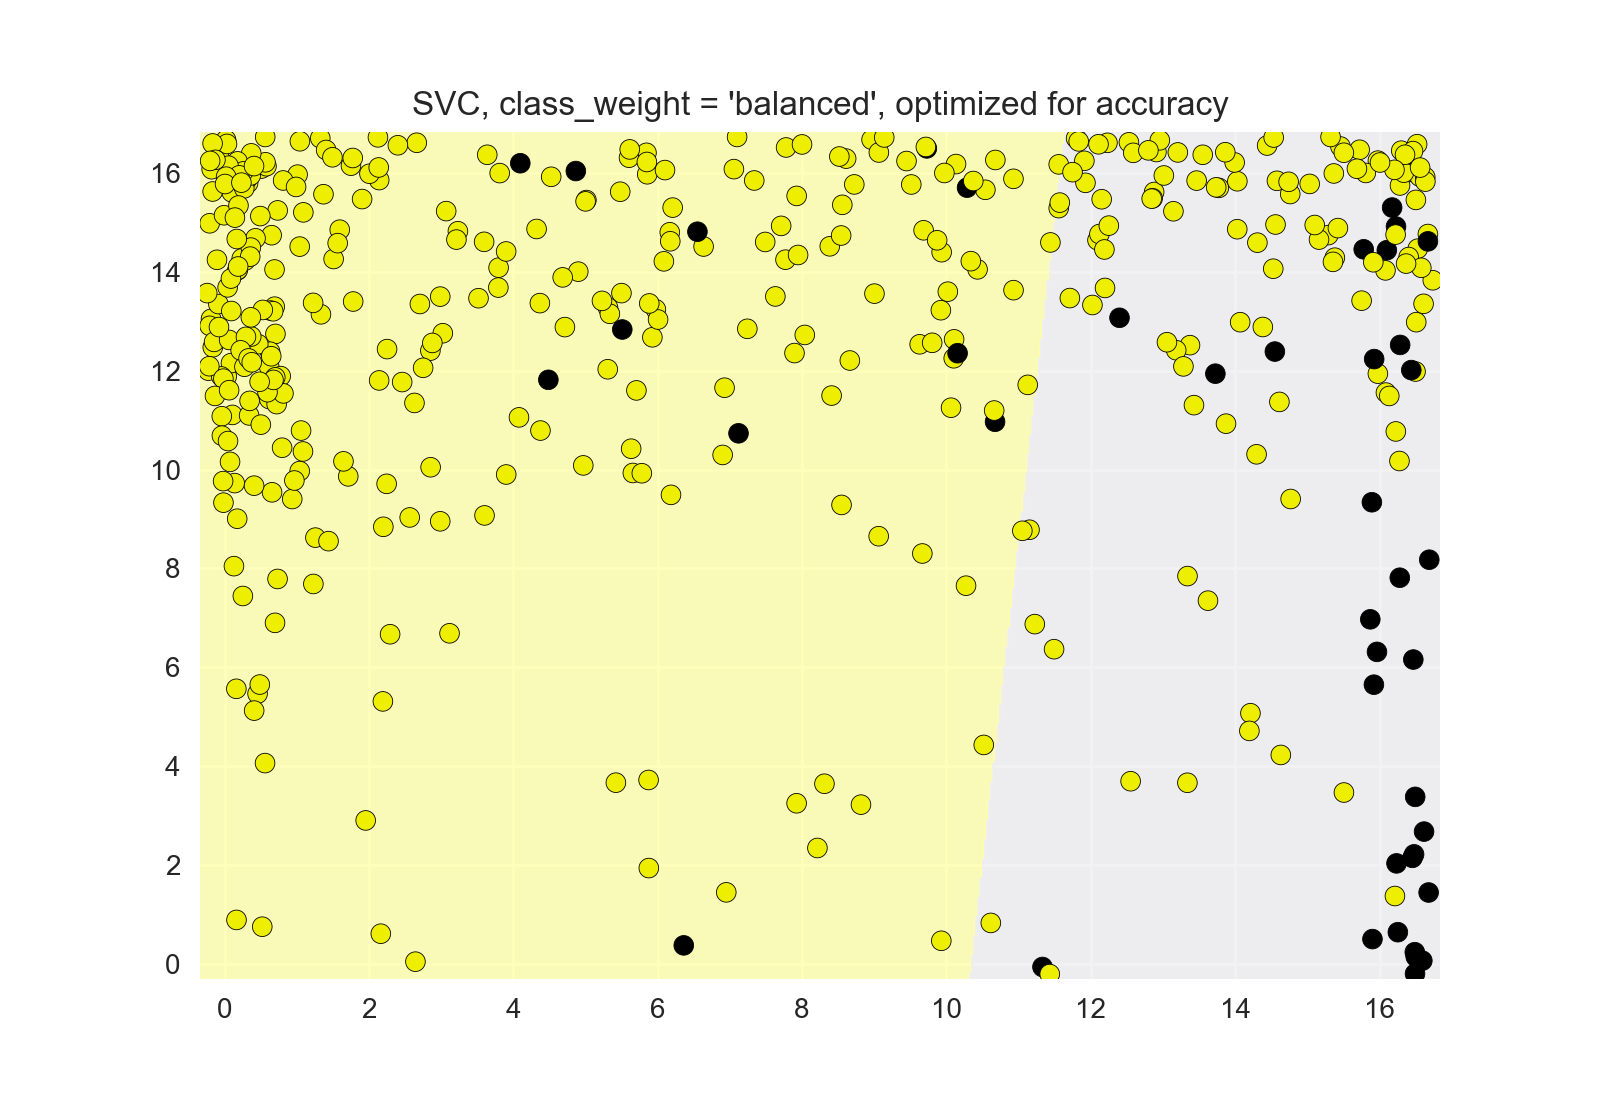

<IPython.core.display.Javascript object>


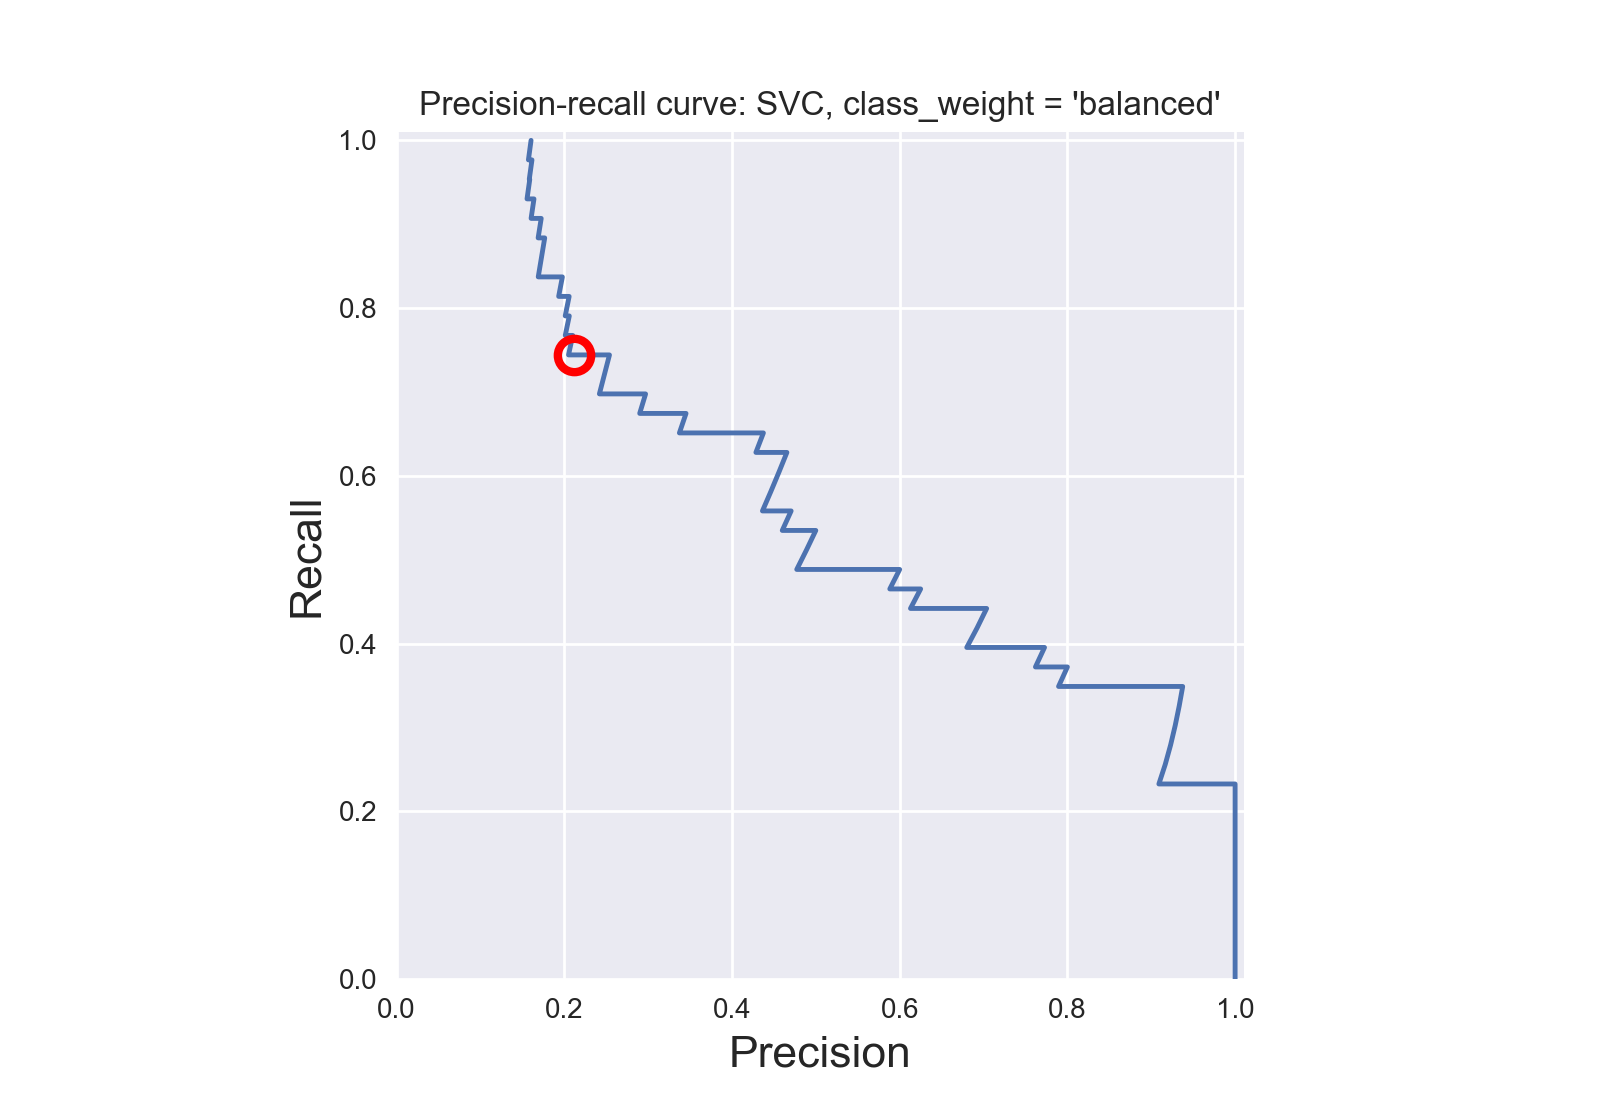

At zero threshold, precision: 0.21, recall: 0.74


In [111]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from adspy_shared_utilities import plot_class_regions_for_classifier
from sklearn.svm import SVC

dataset = load_digits()
X, y = dataset.data, dataset.target == 1
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# create a two-feature input vector matching the example plot above
jitter_delta = 0.25
X_twovar_train = X_train[:,[20,59]]+ np.random.rand(X_train.shape[0], 2) - jitter_delta
X_twovar_test  = X_test[:,[20,59]] + np.random.rand(X_test.shape[0], 2) - jitter_delta

clf = SVC(kernel='linear', class_weight='balanced').fit(X_twovar_train, y_train)

y_scores = clf.decision_function(X_twovar_test)

precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
closest_zero = np.argmin(np.abs(thresholds))
closest_zero_p = precision[closest_zero]
closest_zero_r = recall[closest_zero]

plot_class_regions_for_classifier(clf, X_twovar_test, y_test)
plt.title("SVC, class_weight = 'balanced', optimized for accuracy")
plt.show()

plt.figure()
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.title ("Precision-recall curve: SVC, class_weight = 'balanced'")
plt.plot(precision, recall, label = 'Precision-Recall Curve')
plt.plot(closest_zero_p, closest_zero_r, 'o', markersize=12, fillstyle='none', c='r', mew=3)
plt.xlabel('Precision', fontsize=16)
plt.ylabel('Recall', fontsize=16)
plt.axes().set_aspect('equal')
plt.show()
print('At zero threshold, precision: {:.2f}, recall: {:.2f}'
      .format(closest_zero_p, closest_zero_r))

For simplicity, we've often used a single train test split in showing examples of evaluation scoring. However using only cross-validation or a test set for model selection or parameter tuning may still lead to more settle forms of overfitting and less optimistic evaluation estimates for future unseen data. 

An intuitive explanation for this might be the following. Remember that the whole point of evaluating our test set is to estimate how well a learning algorithm might perform on future unseen data. **The more information we see about our dataset as part of repeated cross-validation passes in choosing our model, the more influence any potential held up test data has played into selecting the final model not merely evaluating it. This is sometimes called data leakage** and we'll describe more about that phenomenon in another module. 

So, we haven't done an evaluation with truly held out test set and let's we commit to holding back a test split that isn't seen by any process until the very end of the evaluation. So that's what's actually done in practice. There are three data splits:
* Training for model building
* Validation for model selection
* A test set for the final evaluation. 

**The training and test sets are typically split out first and then cross-validation is run using the training data to do model and parameter selection. Again, the test set is not seen until the very end of the evaluation process**. Machine learning researchers take this protocol very seriously. They train, validate, test design is a very important universally applied framework for effective evaluation of machine learning models. 

<img src="module3_modelselec_4.png" alt="jupyter" style="width: 600px;"/> 


That brings us to the end of this section of the course of evaluation for machine learning.** You should now understand why accuracy only gives a partial picture of a classifier's performance and be more familiar with the motivation and definition of important alternative evaluation methods and metrics of machine learning like confusion matrices, precision recall, F 1 score and area under the RC curve**. You've also seen how to apply and choose these different evaluation metric alternatives in order to optimize model selection or parameter tuning for a classifier to maximize a given evaluation metric. 

Finally, I'd like to leave you with a couple of points:

* First, simple accuracy may not often be the right goal for your particular machine learning application. As we saw for example with tumor detection or credit card fraud, false positives and false negatives might have very different real world effects for users or for organization outcomes. **So, it's important to select an evaluation metric that reflects those user application or business needs**. 
* Second, there are a number of other dimensions along which it may be important to evaluate your machine learning algorithms that we don't cover here but that are important for you to be aware of. I'll mention two specifically here. **Learning curves are used to assess how a machine learning algorithms evaluation metric changes or improves as the algorithm gets more training data. Learning curve may be useful as part of a cost benefit analysis**. Gathering training data in the form of labeled examples is often time consuming and expensive. So being able to estimate the likely performance improvement of your classifier if you say invest in doubling the amount of training data can be a useful analysis. *Sensitivity analysis*, amounts in looking at how an evaluation metric changes and small adjustments are made to important model parameters. This helps assess how robust the model is to choice of parameters. This may be important to perform especially if there are other costs such as runtime efficiency that are critical variables when deploying an operational system that are correlated with different values of parameter, for example, decision tree depth or future value threshold. In this way, a more complete picture of the tradeoffs achievable across different performance dimensions can help you make the best practical deployment decisions for your machine learning model. 

<img src="module3_modelselec_5.png" alt="jupyter" style="width: 600px;"/> 
